<a href="https://colab.research.google.com/github/usama879/creditcardfraudproject/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Environment Set Up

##1.1 Installing Libraires

In [1]:
#!pip install pandas scikit-learn numpy matplotlib -U gdown


##1.2 Configure GUI Framework

We have selected **Flask** as our GUI framework.

#2.Dataset Exploration


We explored several publicly available cybersecurity and fraud detection datasets, including:

- NSL-KDD (Network Intrusion)
- CICIDS2017 (Network Traffic)
- Credit Card Fraud (Kaggle)
- Synthetic Transactional Fraud (Sparkov + Faker)

After evaluating relevance, size, feature diversity, and suitability for real-time fraud detection, we selected the **Credit Card Fraud Detection** dataset generated using Sparkov and Faker libraries.

**Dataset Summary:**
- Total records: 1,852,394
- Fields: 22
- Target: `is_fraud` (binary classification)
- Time range: Jan 2019 – Dec 2020
- Includes customer details, merchant info, geolocation, and transaction history

This dataset provides a rich base for training, evaluating, and deploying machine learning models for fraud prediction.

#3.Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import gdown
from sklearn.preprocessing import StandardScaler


print("Environment setup complete all the Libraries loaded successfully.")


Environment setup complete all the Libraries loaded successfully.


#4.Data Loading

In [3]:
file_id = '1YU4yMY1_uMj2EnDVEEaVXUHEuBwozcMX'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'CreditCardFraud.csv', quiet=False)

df = pd.read_csv('CreditCardFraud.csv')


Downloading...
From (original): https://drive.google.com/uc?id=1YU4yMY1_uMj2EnDVEEaVXUHEuBwozcMX
From (redirected): https://drive.google.com/uc?id=1YU4yMY1_uMj2EnDVEEaVXUHEuBwozcMX&confirm=t&uuid=4d0fb3bd-c4fc-498f-990f-c73ae2acd4f6
To: /content/CreditCardFraud.csv
100%|██████████| 523M/523M [00:02<00:00, 212MB/s]


##4.1 First 5 Rows of Dataset

In [4]:
display(df.head())

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


##4.2 Last 5 Rows of Dataset

In [5]:
display(df.tail())

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


##4.3 Dataset Dimensions

In [6]:
print("(Rows, Columns):", df.shape)


(Rows, Columns): (1852394, 22)


##4.4 Column Names

In [7]:
print(df.columns.tolist())

['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


##4.5 Columns Datatype

In [8]:
column_dtypes = df.dtypes.to_frame(name='DataType')
column_dtypes.reset_index(inplace=True)
column_dtypes.columns = ['Column', 'DataType']
display(column_dtypes)

,Column,DataType
0,trans_date_trans_time,object
1,cc_num,int64
2,merchant,object
3,category,object
4,amt,float64
5,first,object
6,last,object
7,gender,object
8,street,object
9,city,object


##4.6 Dataset Structure

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

#5.Exploratory Data Analysis (EDA) Summary Statistics



In [10]:
credit_summary = df.describe().T
credit_summary['range'] = credit_summary['max'] - credit_summary['min']
credit_summary[['mean', '50%', 'std', 'min', 'max', 'range']]


,mean,50%,std,min,max,range
cc_num,4.173860e+17,3.521417e+15,1.309115e+18,6.041621e+10,4.992346e+18,4.992346e+18
amt,7.006357e+01,4.745000e+01,1.592540e+02,1.000000e+00,2.894890e+04,2.894790e+04
zip,4.881326e+04,4.817400e+04,2.688185e+04,1.257000e+03,9.992100e+04,9.866400e+04
lat,3.853931e+01,3.935430e+01,5.071470e+00,2.002710e+01,6.669330e+01,4.666620e+01
long,-9.022783e+01,-8.747690e+01,1.374789e+01,-1.656723e+02,-6.795030e+01,9.772200e+01
city_pop,8.864367e+04,2.443000e+03,3.014876e+05,2.300000e+01,2.906700e+06,2.906677e+06
unix_time,1.358674e+09,1.357089e+09,1.819508e+07,1.325376e+09,1.388534e+09,6.315836e+07
merch_lat,3.853898e+01,3.936890e+01,5.105604e+00,1.902742e+01,6.751027e+01,4.848284e+01
merch_long,-9.022794e+01,-8.744069e+01,1.375969e+01,-1.666716e+02,-6.695090e+01,9.972067e+01
is_fraud,5.210015e-03,0.000000e+00,7.199217e-02,0.000000e+00,1.000000e+00,1.000000e+00


#6.Data Visualizations

In [11]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (10, 6)


##6.1 Histograms of Key Numerical Features

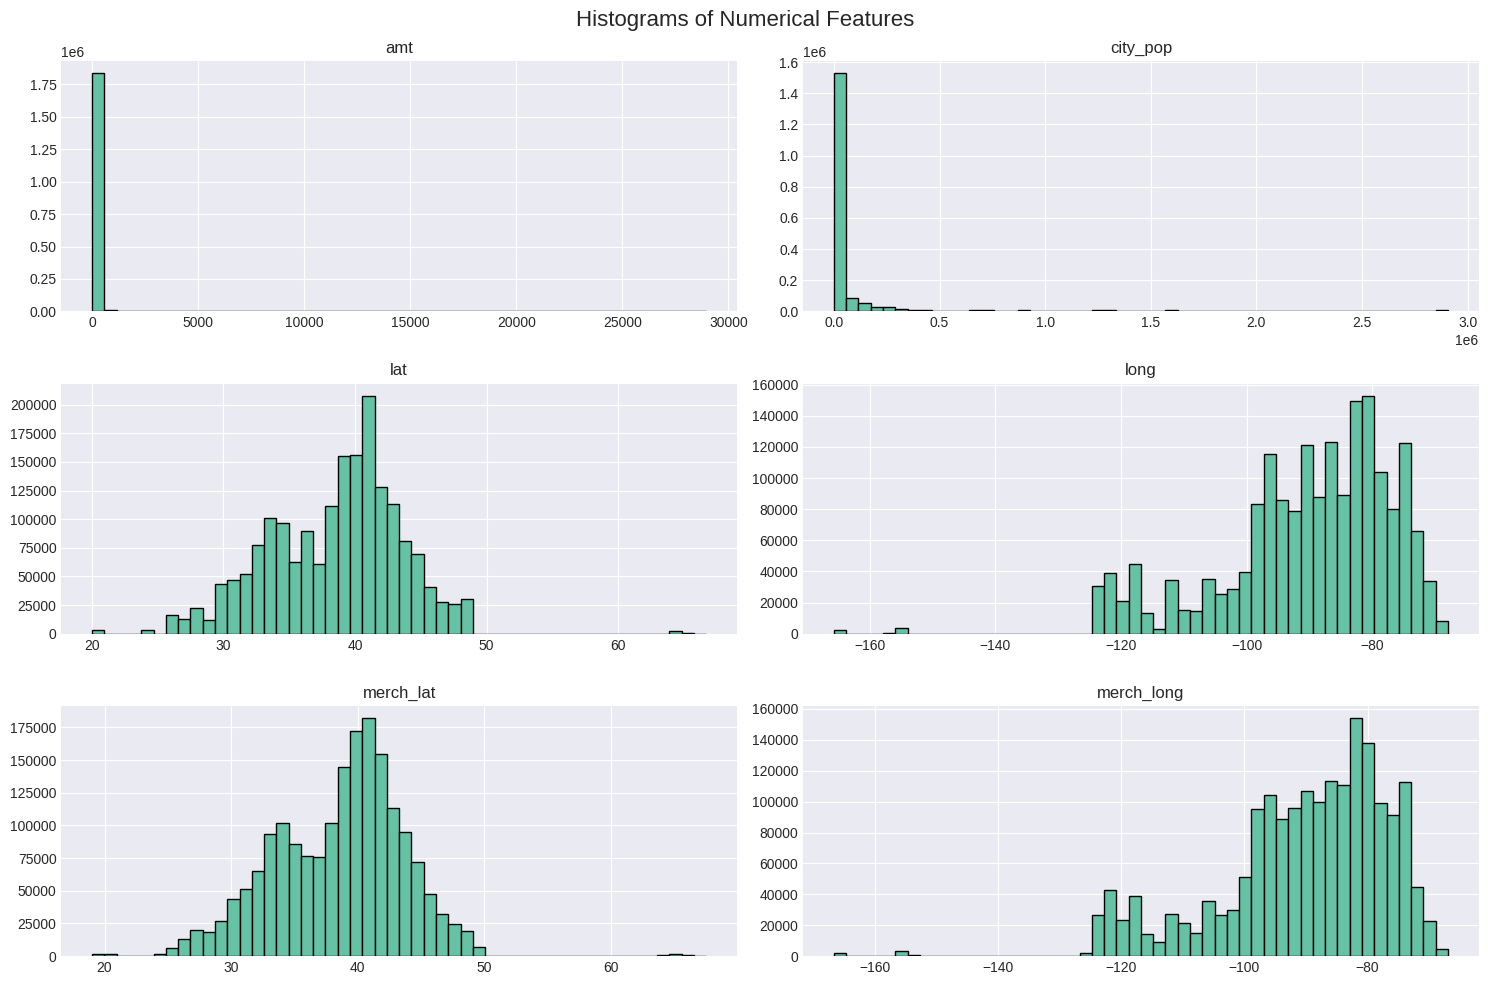

In [12]:
numeric_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
df[numeric_cols].hist(bins=50, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


##6.2 Box Plots to Detect Outliers

In [13]:
numeric_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = outlier_count

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)

print("Number of Outliers per Feature (IQR Method):")
display(outlier_df)


Number of Outliers per Feature (IQR Method):


,Outlier Count
city_pop,346191
amt,95054
long,71026
merch_long,59972
merch_lat,7063
lat,6612


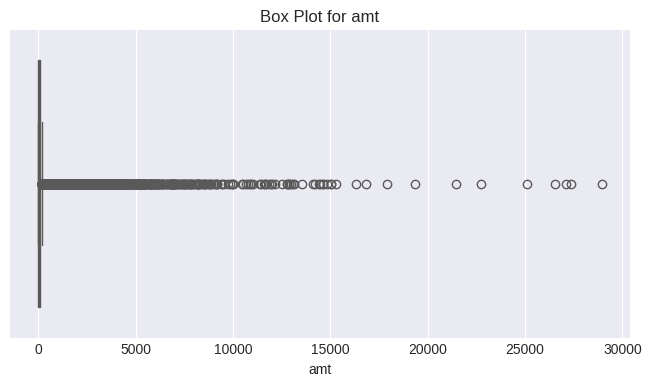

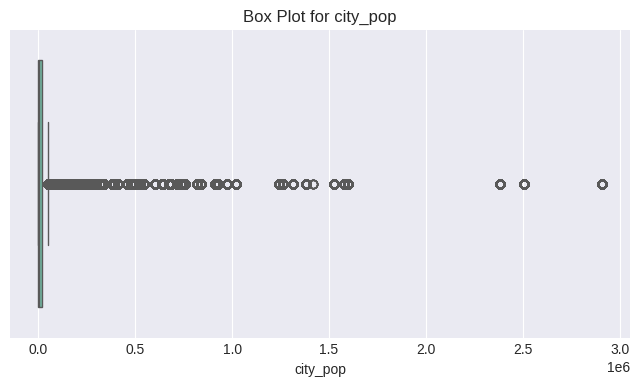

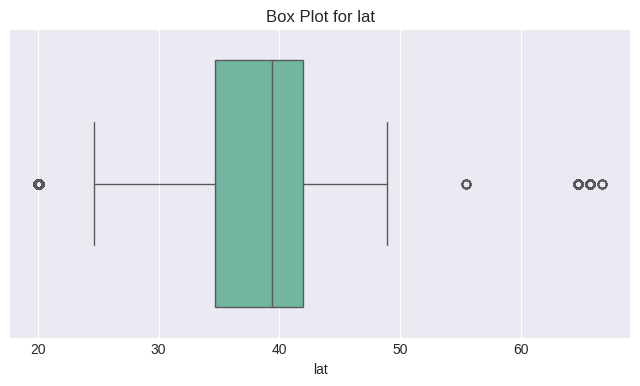

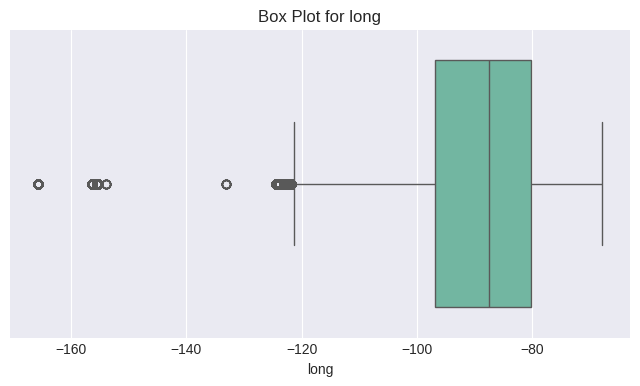

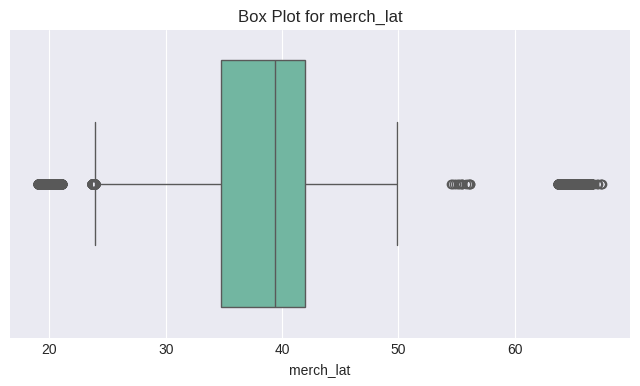

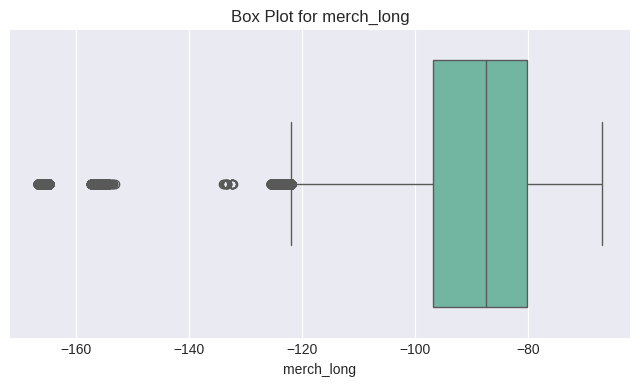

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()


##6.3 Heatmap of Correlation Matrix

In [15]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
print("Correlation Matrix (Table View):")
display(corr_matrix.round(3))


Correlation Matrix (Table View):


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000,0.002,0.042,-0.059,-0.048,-0.009,0.000,-0.058,-0.048,-0.001
amt,0.002,1.000,0.002,-0.001,-0.001,0.005,-0.002,-0.001,-0.001,0.209
zip,0.042,0.002,1.000,-0.115,-0.910,0.078,0.001,-0.114,-0.909,-0.002
lat,-0.059,-0.001,-0.115,1.000,-0.015,-0.155,0.001,0.994,-0.015,0.003
long,-0.048,-0.001,-0.910,-0.015,1.000,-0.052,-0.001,-0.015,0.999,0.001
city_pop,-0.009,0.005,0.078,-0.155,-0.052,1.000,-0.002,-0.154,-0.052,0.000
unix_time,0.000,-0.002,0.001,0.001,-0.001,-0.002,1.000,0.001,-0.001,-0.013
merch_lat,-0.058,-0.001,-0.114,0.994,-0.015,-0.154,0.001,1.000,-0.015,0.003
merch_long,-0.048,-0.001,-0.909,-0.015,0.999,-0.052,-0.001,-0.015,1.000,0.001
is_fraud,-0.001,0.209,-0.002,0.003,0.001,0.000,-0.013,0.003,0.001,1.000


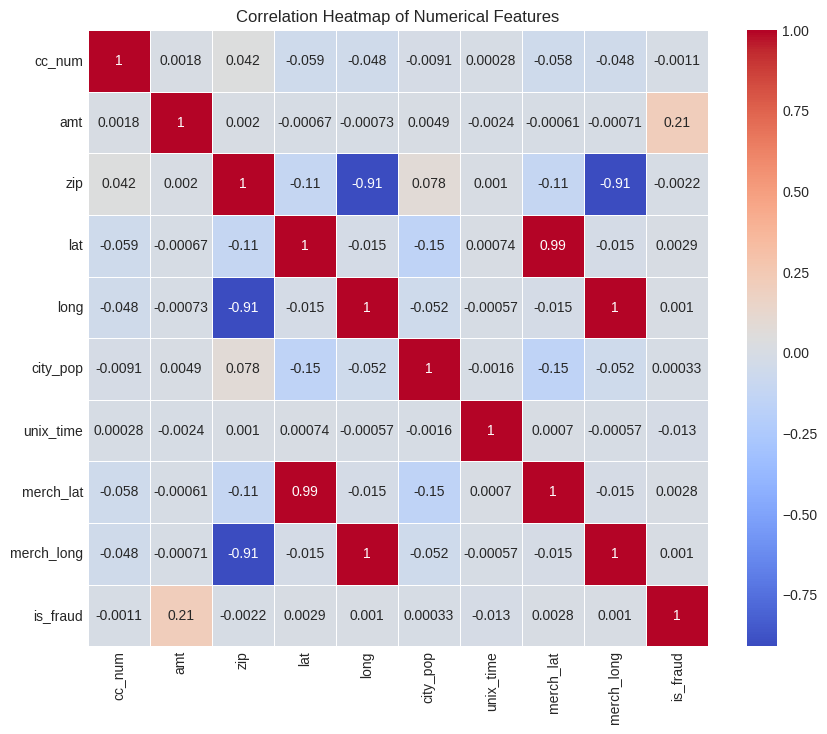

In [16]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


##6.4 Pairplot to Explore Patterns

In [17]:
sample_df = df[['amt', 'city_pop', 'lat', 'long', 'is_fraud']].sample(n=1000, random_state=42)
print("Sample of Selected Features:")
display(sample_df)


Sample of Selected Features:


,amt,city_pop,lat,long,is_fraud
1541144,59.91,18182,45.7801,-111.1439,0
1731581,3.96,76383,42.6911,-71.1605,0
354659,51.17,16305,42.5978,-82.8823,0
1493788,2.06,5161,34.2853,-91.3336,0
468148,6.58,1263321,32.7699,-96.7430,0
...,...,...,...,...,...
1212481,50.62,776,37.7681,-75.6664,0
434765,57.98,6120,44.2320,-74.4905,0
611326,19.10,67082,34.0480,-85.9246,0
751331,5.60,124967,40.6747,-74.2239,0


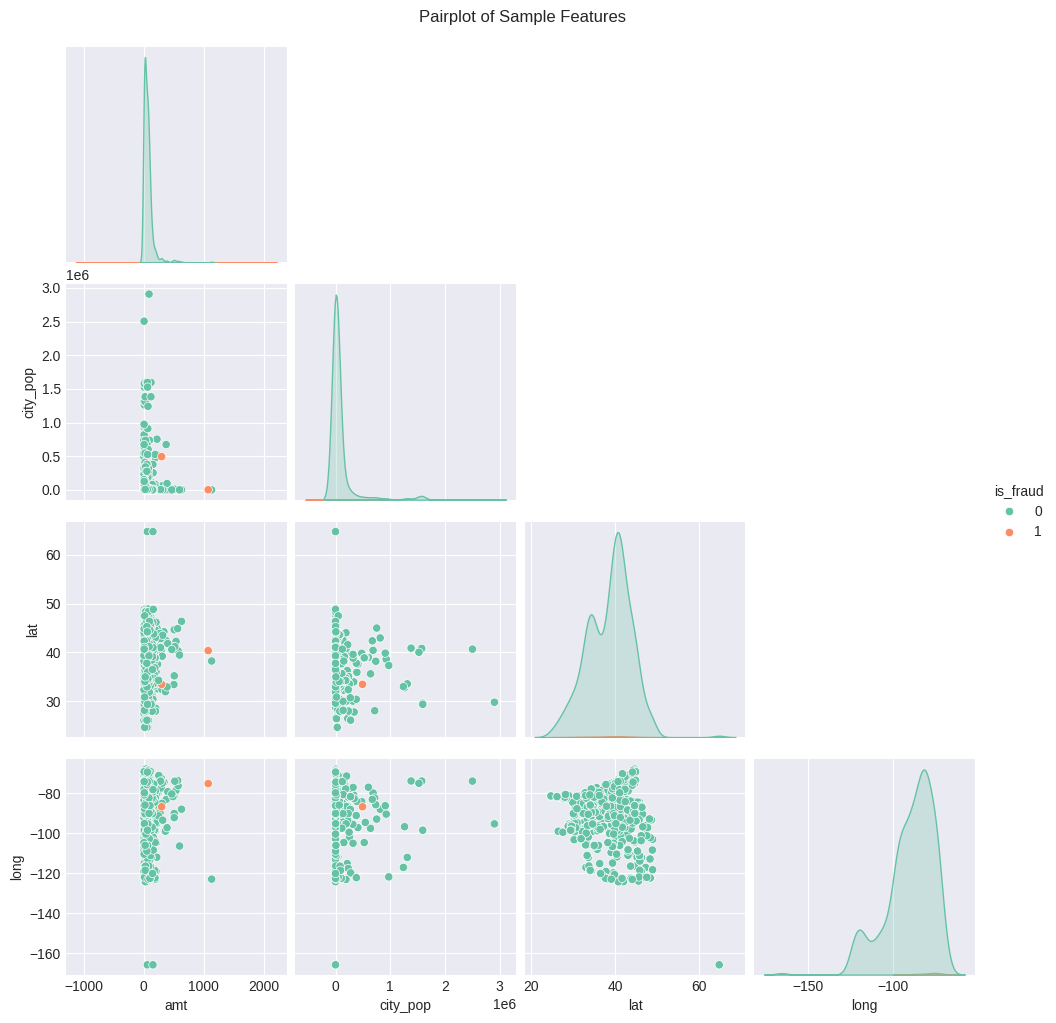

In [18]:
sample_df = df[['amt', 'city_pop', 'lat', 'long', 'is_fraud']].sample(n=1000, random_state=42)

sns.pairplot(sample_df, hue='is_fraud', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Sample Features", y=1.02)
plt.show()


#7.Analyzing Feature Relationships


##7.1 Correlation of Numeric Features with Target (is_fraud)


In [19]:
correlation_with_target = df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)
correlation_table = correlation_with_target.reset_index()
correlation_table.columns = ['Feature', 'Correlation with Target Variable']
print("Correlation of Numerical Features with Target Variable\n")
display(correlation_table)


Correlation of Numerical Features with Target Variable



,Feature,Correlation with Target Variable
0,is_fraud,1.000000
1,amt,0.209308
2,lat,0.002904
3,merch_lat,0.002778
4,long,0.001022
5,merch_long,0.000999
6,city_pop,0.000325
7,cc_num,-0.001125
8,zip,-0.002190
9,unix_time,-0.013329


##7.2 Transaction Amount vs. Fraud Relationship


Transaction Amount Statistics by Fraud Status


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1842743.0,67.651278,153.548108,1.00,9.610,47.24,82.560,28948.90
1,9651.0,530.661412,391.028873,1.06,240.075,390.00,902.365,1376.04


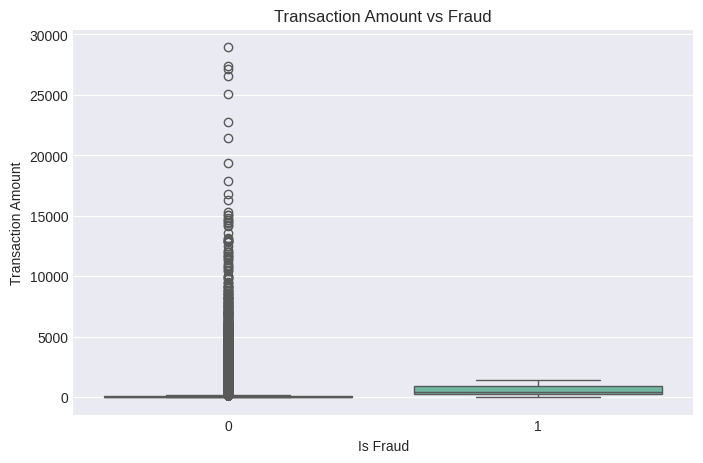

In [20]:
amt_stats = df.groupby('is_fraud')['amt'].describe()
print("Transaction Amount Statistics by Fraud Status")
display(amt_stats)
print("\n")

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title("Transaction Amount vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()


##7.3 City Population vs. Fraud Relationship


City Population Statistics by Fraud Status


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1842743.0,88636.579284,301462.369283,23.0,741.0,2443.0,20328.0,2906700.0
1,9651.0,89998.422961,306283.338105,23.0,795.0,2693.0,19054.0,2906700.0


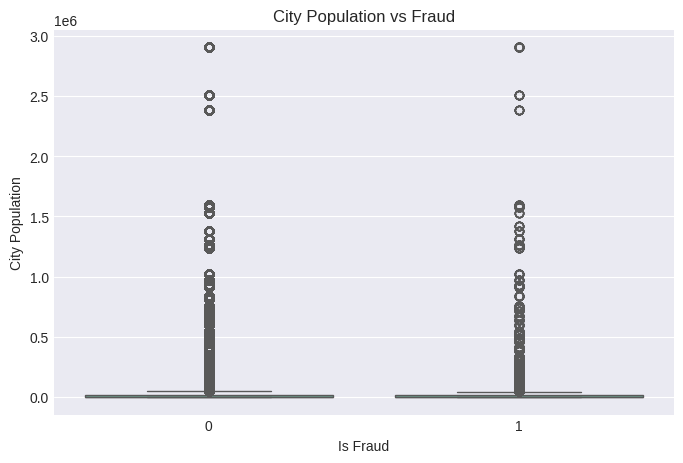

In [21]:
citypop_stats = df.groupby('is_fraud')['city_pop'].describe()
print("City Population Statistics by Fraud Status")
display(citypop_stats)
print("\n")

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='city_pop', data=df)
plt.title("City Population vs Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("City Population")
plt.show()


##7.4 Transaction Category vs. Fraud Relationship


Transaction Category by Fraud Status


is_fraud,0,1
category,,
entertainment,133826,292
food_dining,130524,205
gas_transport,187257,772
grocery_net,64703,175
grocery_pos,173963,2228
health_fitness,122368,185
home,175195,265
kids_pets,161423,304
misc_net,89472,1182


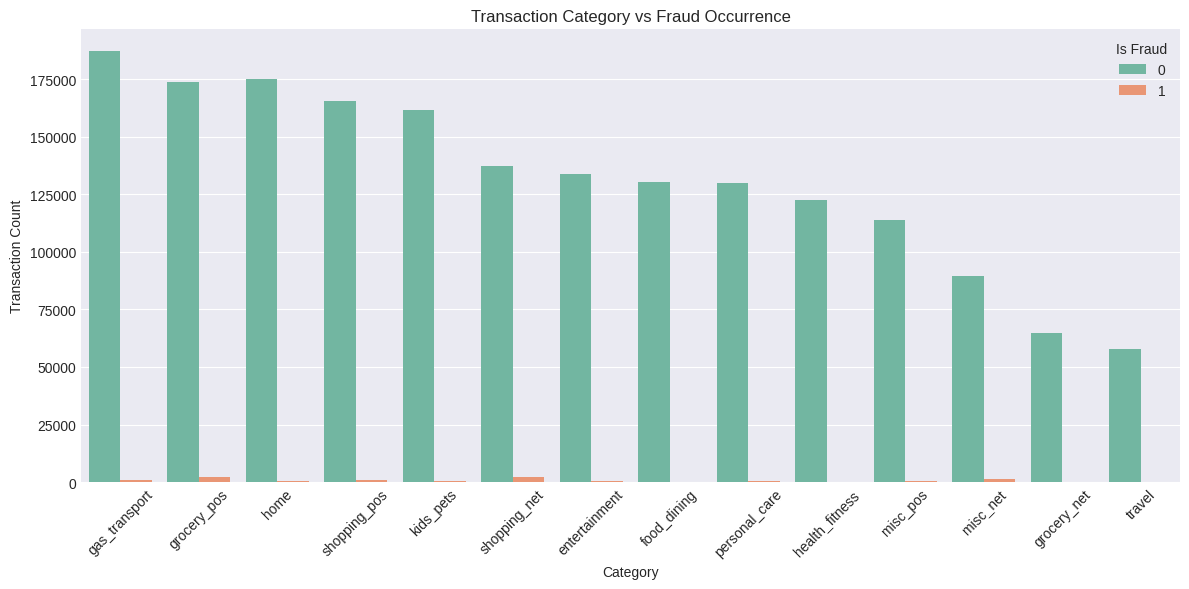

In [22]:
category_fraud_counts = df.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)
print("Transaction Category by Fraud Status")
display(category_fraud_counts)
print("\n")

plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=df, order=df['category'].value_counts().index)
plt.title("Transaction Category vs Fraud Occurrence")
plt.xlabel("Category")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()


#8.Data Pre-processing

##8.1 Check for Missing Values

In [23]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Missing Values Found:")
    print(missing_values)
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


##8.2 Check for Duplicate Records

             Type    Count
0  Duplicate Rows        0
1     Unique Rows  1852394


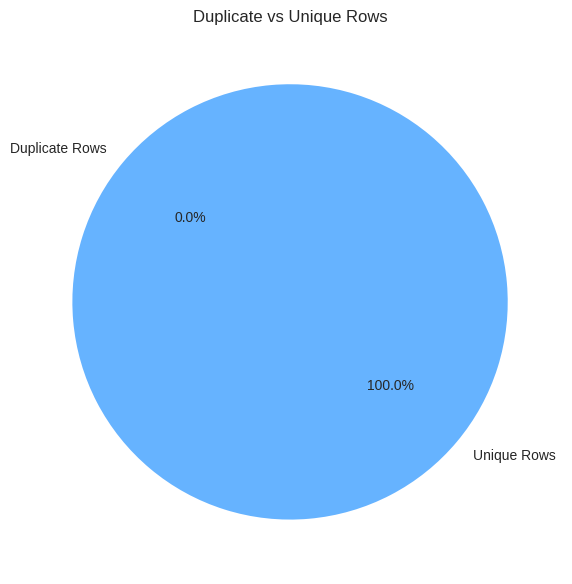

In [24]:
total_duplicates = df.duplicated().sum()
non_duplicates = len(df) - total_duplicates
duplicate_table = pd.DataFrame({
    'Type': ['Duplicate Rows', 'Unique Rows'],
    'Count': [total_duplicates, non_duplicates]
})
print(duplicate_table)

plt.figure(figsize=(6, 6))
plt.pie([total_duplicates, non_duplicates],
        labels=['Duplicate Rows', 'Unique Rows'],
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff'],
        startangle=140)
plt.title("Duplicate vs Unique Rows")
plt.tight_layout()
plt.show()


##8.3 Detect Outliers Using IQR Method

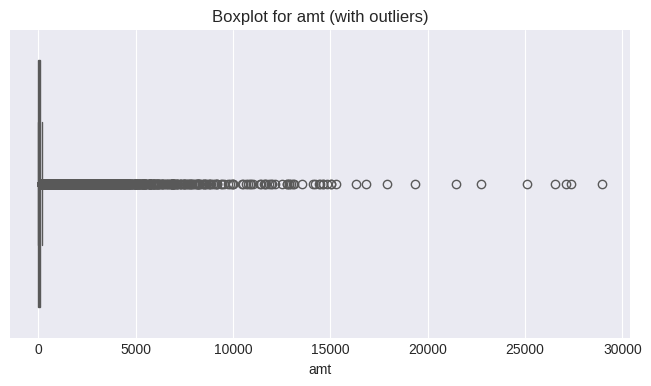

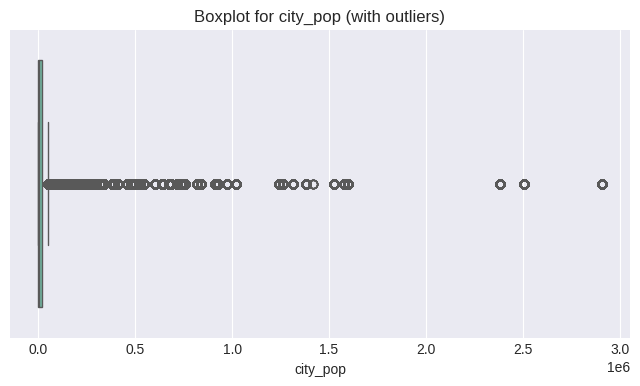

    Feature  Outlier Count
0       amt          95054
1  city_pop         346191


In [25]:
numeric_cols = ['amt', 'city_pop']
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} (with outliers)')
    plt.show()

outlier_table = pd.DataFrame(list(outlier_summary.items()), columns=['Feature', 'Outlier Count'])
print(outlier_table)



##8.4 Remove outliers from amt variable

In [26]:
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)]

outlier_removed_table = pd.DataFrame({
    'Original Row Count': [len(df)],
    'Cleaned Row Count': [len(df_cleaned)],
    'Removed Outliers': [len(df) - len(df_cleaned)]
})

print(outlier_removed_table)


   Original Row Count  Cleaned Row Count  Removed Outliers
0             1852394            1757340             95054


#9.Feature Scaling and Normalization

In [27]:
numerical_columns_to_normalize = ['amt', 'city_pop']
scaler = MinMaxScaler()
df[numerical_columns_to_normalize] = scaler.fit_transform(df[numerical_columns_to_normalize])

print(df[numerical_columns_to_normalize].head())


        amt  city_pop
0  0.000137  0.001194
1  0.003670  0.000043
2  0.007569  0.001421
3  0.001520  0.000659
4  0.001415  0.000026


#10.Encode Categorical Variables



##10.1 Binary Encoding of 'gender' variable

In [28]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})
print("Gender column successfully encoded (F = 0, M = 1)")
print(df['gender'].value_counts())


Gender column successfully encoded (F = 0, M = 1)
gender
0    1014749
1     837645
Name: count, dtype: int64


##10.2 One-Hot Encoding of Multi-Class Categorical variable

In [29]:
one_hot_columns = ['category']
encoded_df = pd.get_dummies(df[one_hot_columns], prefix=one_hot_columns, drop_first=True)
encoded_df = encoded_df.astype(int)
df = pd.concat([df, encoded_df], axis=1)

print("One-Hot Encoding completed for:", one_hot_columns)
print("New total columns in the dataset:", df.shape[1])

encoded_cols = [col for col in df.columns if col.startswith('category_')]
print("Sample encoded columns:", encoded_cols[:10])



One-Hot Encoding completed for: ['category']
New total columns in the dataset: 35
Sample encoded columns: ['category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care']


#11.Feature Engineering

##11.1 Convert Transaction Time to Date Features



In [30]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month.astype(str).str.zfill(2)
df['day'] = df['trans_date_trans_time'].dt.day.astype(str).str.zfill(2)
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df.drop('trans_date_trans_time', axis=1, inplace=True)
print(df[['year', 'month', 'day', 'hour', 'minute']].head())


   year month day  hour  minute
0  2019    01  01     0       0
1  2019    01  01     0       0
2  2019    01  01     0       0
3  2019    01  01     0       1
4  2019    01  01     0       3


##11.2 Convert 'dob' to datetime and calculate age



In [31]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
def calculate_age(born):
    if pd.isnull(born):
        return None
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['dob'].apply(calculate_age)
print(df[['dob', 'age']].head())


         dob  age
0 1988-03-09   37
1 1978-06-21   47
2 1962-01-19   63
3 1967-01-12   58
4 1986-03-28   39


##11.3 Transaction Frequency per User

In [32]:
df['transaction_time'] = pd.to_datetime(df['unix_time'], unit='s')
df = df.sort_values(by=['cc_num', 'transaction_time'])

def count_transactions_last_24h(group):
    return group.set_index('transaction_time') \
                .rolling('1D').cc_num.count() - 1

df['transactions_last_24h'] = df.groupby('cc_num', group_keys=False) \
                                 .apply(count_transactions_last_24h) \
                                 .fillna(0).astype(int) \
                                 .reset_index(drop=True)

print(df[['cc_num', 'transaction_time', 'transactions_last_24h']].head(10))



           cc_num    transaction_time  transactions_last_24h
1017  60416207185 2012-01-01 12:47:15                      4
2724  60416207185 2012-01-02 08:44:57                      6
2726  60416207185 2012-01-02 08:47:36                      5
2882  60416207185 2012-01-02 12:38:14                      4
2907  60416207185 2012-01-02 13:10:46                      1
4135  60416207185 2012-01-03 13:56:35                      3
4337  60416207185 2012-01-03 17:05:10                     10
5467  60416207185 2012-01-04 13:59:55                      1
6027  60416207185 2012-01-04 21:17:22                      0
6273  60416207185 2012-01-05 00:42:24                      0


/tmp/ipython-input-1334670959.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_transactions_last_24h) \


In [33]:
df = df.drop(columns=['transaction_time', 'dob', 'trans_num'])

In [34]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display(df.head())


,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,year,month,day,hour,minute,age,transactions_last_24h
1017,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,0.000217,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,0.000558,Information systems manager,1325422035,43.974711,-109.741904,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2019,01,01,12,47,39,4
2724,60416207185,fraud_Berge LLC,gas_transport,0.001794,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,0.000558,Information systems manager,1325493897,42.018766,-109.044172,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2019,01,02,8,44,39,6
2726,60416207185,fraud_Luettgen PLC,gas_transport,0.002801,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,0.000558,Information systems manager,1325494056,42.961335,-109.157564,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2019,01,02,8,47,39,5
2882,60416207185,fraud_Daugherty LLC,kids_pets,0.001167,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,0.000558,Information systems manager,1325507894,42.228227,-108.747683,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,01,02,12,38,39,4
2907,60416207185,fraud_Beier and Sons,home,0.000904,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,WY,82514,43.0048,-108.8964,0.000558,Information systems manager,1325509846,43.321745,-108.091143,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2019,01,02,13,10,39,1


#12.Data Splitting: Training, Validation and Test

In [35]:
df = df.rename(columns={'is_fraud': 'class'})

X = df.drop('class', axis=1)
y = df['class']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)


In [36]:
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (1296675, 38) (1296675,)
Validation set: (277859, 38) (277859,)
Test set: (277860, 38) (277860,)



Fraud ratio in each set:
Train: 0.005210249291456996
Validation: 0.005207677275164742
Test: 0.005211257467789534 



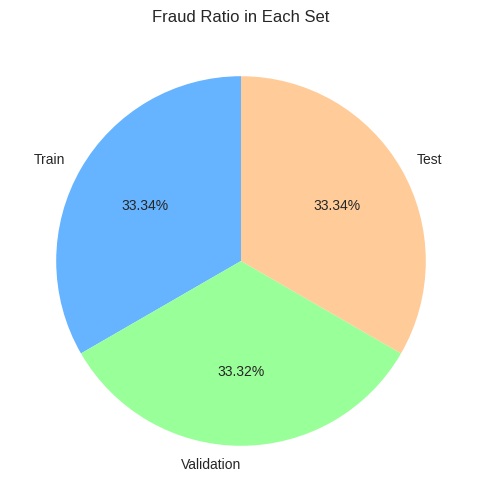

In [37]:
print("\nFraud ratio in each set:")
print("Train:", y_train.mean())
print("Validation:", y_val.mean())
print("Test:", y_test.mean(),"\n")

fraud_ratios = {
    "Train": y_train.mean(),
    "Validation": y_val.mean(),
    "Test": y_test.mean()
}

labels = fraud_ratios.keys()
sizes = [v * 100 for v in fraud_ratios.values()]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=90, colors=["#66b3ff","#99ff99","#ffcc99"])
plt.title("Fraud Ratio in Each Set")
plt.show()


#13.Defining Baseline + Advanced ML Models and Metrics for Evaluation




In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=200,
        solver="saga",
        n_jobs=-1,
        random_state=42
    ),

    "Naive Bayes": GaussianNB(),

    "Random Forest": RandomForestClassifier(
        n_estimators=5,
        max_depth=3,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        n_estimators=20,
        max_depth=3,
        learning_rate=0.2,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method="hist",
        eval_metric="logloss",
        use_label_encoder=False
    ),

    "LightGBM": LGBMClassifier(
        n_estimators=20,
        max_depth=4,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),

    "MLP Neural Net": MLPClassifier(
        hidden_layer_sizes=(32,),
        max_iter=50,
        early_stopping=True,
        random_state=42
    )
}

print("Models defined:")
for name in models.keys():
    print("-", name)


Models defined:
- Logistic Regression
- Naive Bayes
- Random Forest
- XGBoost
- LightGBM
- MLP Neural Net


In [39]:
metrics = ["Accuracy", "Recall", "F1-Score", "PR-AUC", "ROC-AUC", "Precision", "Confusion Matrix"]

print("Evaluation metrics defined:")
for m in metrics:
    print("-", m)


Evaluation metrics defined:
- Accuracy
- Recall
- F1-Score
- PR-AUC
- ROC-AUC
- Precision
- Confusion Matrix


#14.Data Imbalance

##14.1 Inspect Class Distribution (Before SMOTE)

In [40]:
print("Class distribution in training set (before SMOTE):\n")
print(y_train.value_counts(),"\n")



Class distribution in training set (before SMOTE):

class
0    1289919
1       6756
Name: count, dtype: int64 



##14.2 Select Numeric Columns for SMOTE



In [41]:
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train_numeric = X_train[numeric_cols]

pd.set_option('display.max_rows', None)
print("Selected numeric columns for SMOTE:\n")
numeric_df = pd.DataFrame(numeric_cols, columns=["Numeric Columns"])
display(numeric_df.head(len(numeric_df)))



Selected numeric columns for SMOTE:



,Numeric Columns
0,cc_num
1,amt
2,gender
3,zip
4,lat
5,long
6,city_pop
7,unix_time
8,merch_lat
9,merch_long


##14.3 Applying SMOTE on Training Set

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_numeric, y_train)

print("Class distribution after SMOTE:\n")
print(y_train_resampled.value_counts())



Class distribution after SMOTE:

class
0    1289919
1    1289919
Name: count, dtype: int64


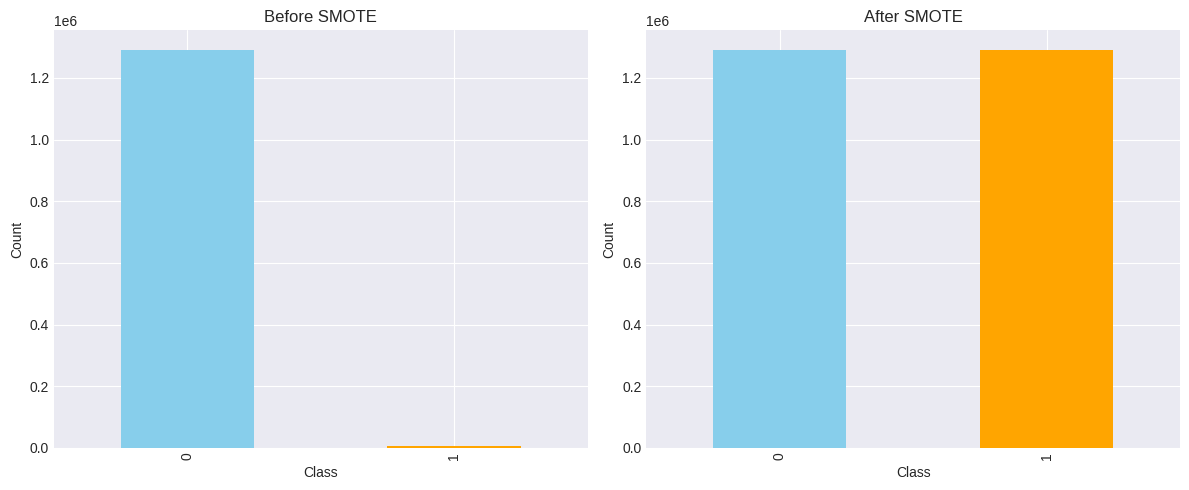

In [43]:
class_colors = {0: "skyblue", 1: "orange"}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

y_train.value_counts().plot(
    kind="bar",
    ax=axes[0],
    color=[class_colors[c] for c in y_train.value_counts().index]
)
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

y_train_resampled.value_counts().plot(
    kind="bar",
    ax=axes[1],
    color=[class_colors[c] for c in y_train_resampled.value_counts().index]
)
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()



##14.4 Confirm Balanced Distribution

In [44]:
print("Final shape of X_train_resampled:", X_train_resampled.shape)
print("Final shape of y_train_resampled:", y_train_resampled.shape)



Final shape of X_train_resampled: (2579838, 25)
Final shape of y_train_resampled: (2579838,)


#15.Models Training and Evaluation

##15.1 Train Models and Evaluate on Validation Set

In [45]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, confusion_matrix, accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def evaluate_model(name, model, X_val, y_val, results):
    y_pred = model.predict(X_val)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val)[:, 1]
    else:
        try:
            y_proba = model.decision_function(X_val)
        except:
            y_proba = None

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)

    roc_auc = roc_auc_score(y_val, y_proba) if y_proba is not None else 0
    pr_auc = average_precision_score(y_val, y_proba) if y_proba is not None else 0

    cm = confusion_matrix(y_val, y_pred)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc
    })

    print(f"\n{name} - Confusion Matrix:")
    print(cm)


models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(
    n_estimators=5,
    max_depth=3,
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "MLP": MLPClassifier(
    hidden_layer_sizes=(32,),
    max_iter=30,
    batch_size=4096,
    early_stopping=True,
    random_state=42)

}

results_val = []
trained_models = {}


In [46]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    trained_models[name] = model
    evaluate_model(
        name,
        model,
        X_val.select_dtypes(include=["int64", "float64"]),
        y_val,
        results_val
    )



Training Logistic Regression...

Logistic Regression - Confusion Matrix:
[[276412      0]
 [  1447      0]]

Training Naive Bayes...

Naive Bayes - Confusion Matrix:
[[ 25332 251080]
 [   133   1314]]

Training Random Forest...

Random Forest - Confusion Matrix:
[[266067  10345]
 [   361   1086]]

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:36:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost - Confusion Matrix:
[[268423   7989]
 [   156   1291]]

Training LightGBM...
[LightGBM] [Info] Number of positive: 1289919, number of negative: 1289919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.189394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2431
[LightGBM] [Info] Number of data points in the train set: 2579838, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM - Confusion Matrix:
[[263908  12504]
 [   154   1293]]

Training MLP...

MLP - Confusion Matrix:
[[255572  20840]
 [  1320    127]]


##15.2 Models Performances on Validation Set

In [47]:
results_val_df = pd.DataFrame(results_val)
print("\nValidation Set Model Performance:\n")
display(results_val_df)




Validation Set Model Performance:



,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,PR AUC
0,Logistic Regression,0.994792,0.000000,0.000000,0.000000,0.505465,0.005456
1,Naive Bayes,0.095898,0.005206,0.908086,0.010353,0.501285,0.005314
2,Random Forest,0.961470,0.095005,0.750518,0.168660,0.895910,0.170709
3,XGBoost,0.970687,0.139116,0.892191,0.240701,0.990155,0.755592
4,LightGBM,0.954445,0.093716,0.893573,0.169641,0.984959,0.643023
5,MLP,0.920247,0.006057,0.087768,0.011332,0.506187,0.005282


##15.3 Confusion Matrices

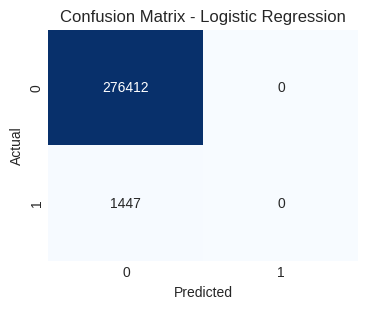

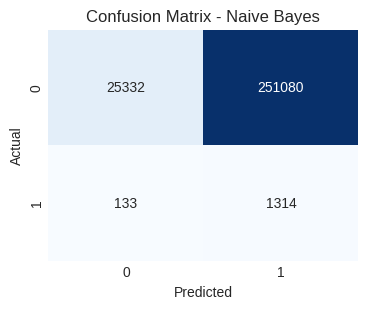

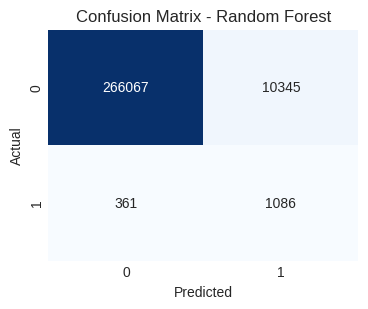

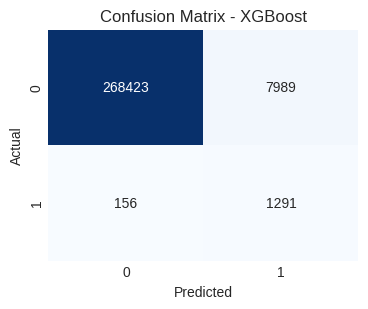

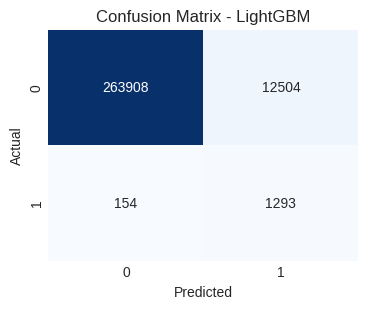

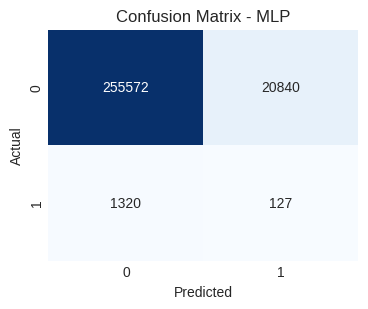

In [48]:
from sklearn.metrics import confusion_matrix

for name, model in trained_models.items():
    y_pred = model.predict(X_val.select_dtypes(include=['int64','float64']))
    cm = confusion_matrix(y_val, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



##15.4 ROC Curves

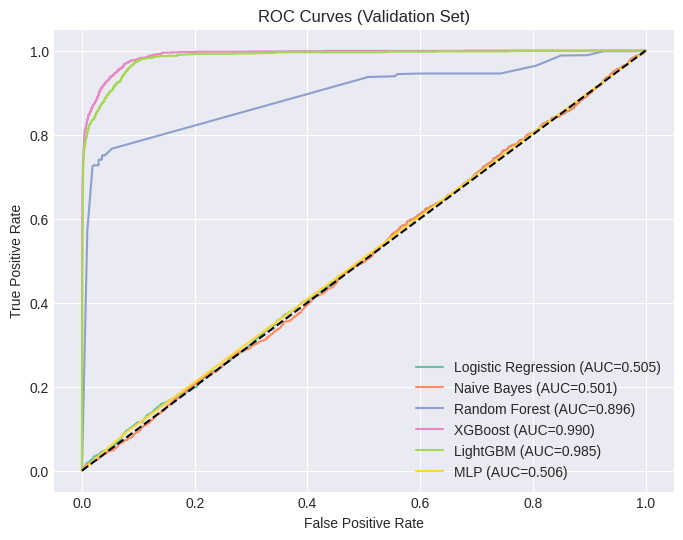

In [49]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, model in trained_models.items():
    y_probs = model.predict_proba(X_val.select_dtypes(include=['int64','float64']))[:,1]
    fpr, tpr, _ = roc_curve(y_val, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Validation Set)")
plt.legend()
plt.show()



##15.5 Precision–Recall Curves

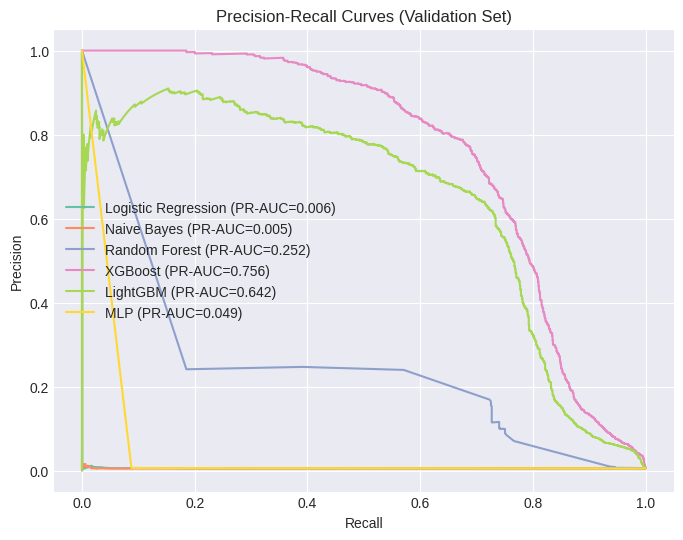

In [50]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))
for name, model in trained_models.items():
    y_probs = model.predict_proba(X_val.select_dtypes(include=['int64','float64']))[:,1]
    precision, recall, _ = precision_recall_curve(y_val, y_probs)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (PR-AUC={pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves (Validation Set)")
plt.legend()
plt.show()



##15.6 Bar Chart for Metrics

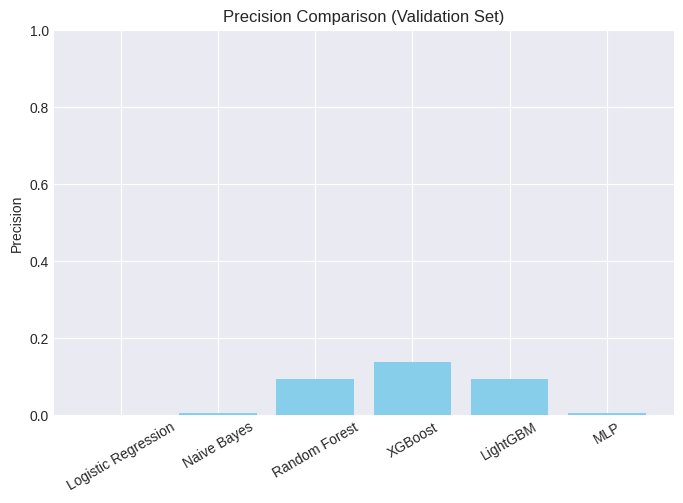

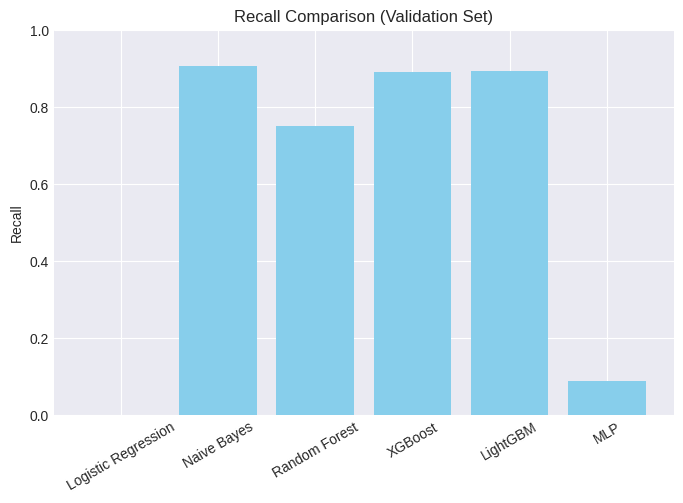

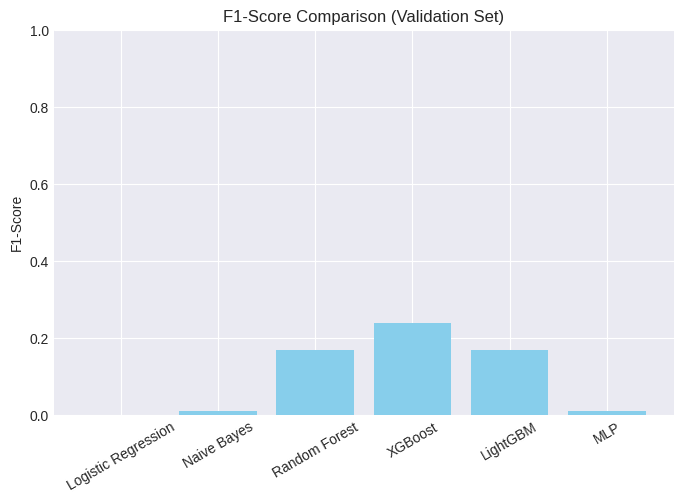

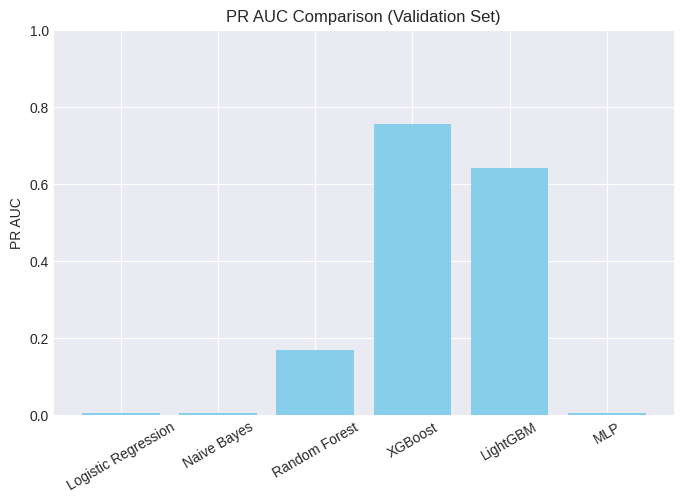

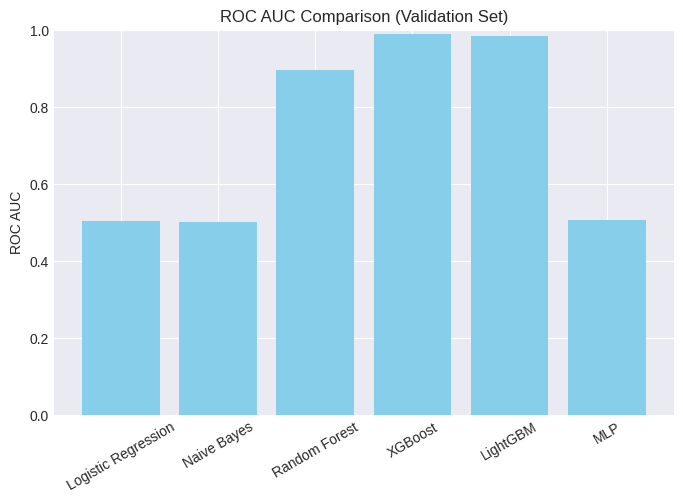

In [51]:
metrics_to_plot = ["Precision", "Recall", "F1-Score", "PR AUC", "ROC AUC"]

for metric in metrics_to_plot:
    plt.figure(figsize=(8,5))
    plt.bar(results_val_df["Model"], results_val_df[metric], color='skyblue')
    plt.title(f"{metric} Comparison (Validation Set)")
    plt.ylabel(metric)
    plt.xticks(rotation=30)
    plt.ylim(0, 1)
    plt.show()



#16.Feature Selection


##16.1 Extract Feature Importances

In [52]:
from IPython.display import display

feature_importances = pd.DataFrame({
    "Feature": X_train_resampled.columns,
    "LightGBM": models["LightGBM"].feature_importances_,
    "RandomForest": models["Random Forest"].feature_importances_,
    "XGBoost": models["XGBoost"].feature_importances_,
})

feature_importances["Average"] = feature_importances[["LightGBM", "RandomForest", "XGBoost"]].mean(axis=1)
feature_importances = feature_importances.sort_values("Average", ascending=False).reset_index(drop=True)
top15 = feature_importances.head(15)

display(top15)



,Feature,LightGBM,RandomForest,XGBoost,Average
0,amt,664,0.937928,0.095131,221.677686
1,age,251,0.000372,0.004337,83.668237
2,unix_time,239,0.000850,0.004139,79.668330
3,city_pop,213,0.000000,0.004773,71.001591
4,cc_num,123,0.000027,0.003063,41.001030
5,category_misc_pos,116,0.000000,0.055383,38.685128
6,category_shopping_pos,114,0.002168,0.056277,38.019482
7,lat,105,0.000000,0.003701,35.001234
8,category_misc_net,102,0.000000,0.048726,34.016242
9,category_shopping_net,101,0.001596,0.052836,33.684811


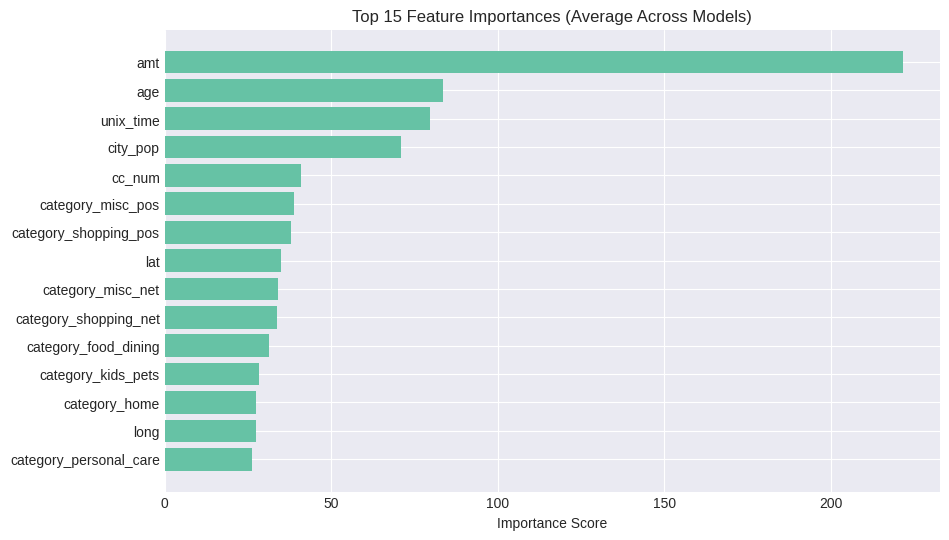

In [53]:
plt.figure(figsize=(10,6))
plt.barh(feature_importances["Feature"].head(15), feature_importances["Average"].head(15))
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Average Across Models)")
plt.xlabel("Importance Score")
plt.show()



##16.2 Select Top 15 Important Features

In [54]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
    roc_auc_score,
    average_precision_score
)

top_features = feature_importances["Feature"].head(15).tolist()
X_train_resampled_selected = X_train_resampled[top_features]
X_val_selected = X_val[top_features]

print("Selected Features for Training:", top_features)
print("Shape of reduced training set:", X_train_resampled_selected.shape)
print("Shape of reduced validation set:", X_val_selected.shape)




Selected Features for Training: ['amt', 'age', 'unix_time', 'city_pop', 'cc_num', 'category_misc_pos', 'category_shopping_pos', 'lat', 'category_misc_net', 'category_shopping_net', 'category_food_dining', 'category_kids_pets', 'category_home', 'long', 'category_personal_care']
Shape of reduced training set: (2579838, 15)
Shape of reduced validation set: (277859, 15)


##16.3 Retrain Models on Selected Features

In [55]:
from sklearn.metrics import (
    precision_recall_fscore_support,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    accuracy_score
)

results_val_afterFS = []

def evaluate_model_afterFS(name, model, X_val_sel, y_val_sel, results_list):
    y_pred = model.predict(X_val_sel)
    y_probs = model.predict_proba(X_val_sel)[:,1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_val_sel, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_val_sel, y_pred, average="binary")
    roc_auc = roc_auc_score(y_val_sel, y_probs) if y_probs is not None else 0.5
    pr_auc = average_precision_score(y_val_sel, y_probs) if y_probs is not None else 0.0

    results_list.append([name, accuracy, precision, recall, f1, roc_auc, pr_auc])

    print(f"\n{name} - Confusion Matrix (After Feature Selection):")
    print(confusion_matrix(y_val_sel, y_pred))

for name, model in models.items():
    print(f"\nTraining {name} on selected features...")
    model.fit(X_train_resampled_selected, y_train_resampled)
    evaluate_model_afterFS(name, model, X_val_selected, y_val, results_val_afterFS)

results_val_afterFS = pd.DataFrame(
    results_val_afterFS,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC", "PR AUC"]
)

print("\nValidation Results After Feature Selection:")
print(results_val_afterFS)



Training Logistic Regression on selected features...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression - Confusion Matrix (After Feature Selection):
[[276412      0]
 [  1447      0]]

Training Naive Bayes on selected features...

Naive Bayes - Confusion Matrix (After Feature Selection):
[[ 25332 251080]
 [   133   1314]]

Training Random Forest on selected features...

Random Forest - Confusion Matrix (After Feature Selection):
[[267186   9226]
 [   400   1047]]

Training XGBoost on selected features...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:39:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost - Confusion Matrix (After Feature Selection):
[[269106   7306]
 [   153   1294]]

Training LightGBM on selected features...
[LightGBM] [Info] Number of positive: 1289919, number of negative: 1289919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 2579838, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM - Confusion Matrix (After Feature Selection):
[[264300  12112]
 [   170   1277]]

Training MLP on selected features...

MLP - Confusion Matrix (After Feature Selection):
[[255572  20840]
 [  1320    127]]

Validation Results After Feature Selection:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC  \
0  Logistic Regressio

##16.4 Model Performance on Validation Set after Feature Selection

In [56]:
display(results_val_afterFS.style.set_caption("Validation Set Performance (After Feature Selection)")
        .format(precision=5))



,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,PR AUC
0,Logistic Regression,0.99479,0.00000,0.00000,0.00000,0.50547,0.00546
1,Naive Bayes,0.09590,0.00521,0.90809,0.01035,0.50132,0.00532
2,Random Forest,0.96536,0.10192,0.72357,0.17867,0.85513,0.09457
3,XGBoost,0.97316,0.15047,0.89426,0.25759,0.98224,0.66021
4,LightGBM,0.95580,0.09538,0.88252,0.17215,0.97651,0.53843
5,MLP,0.92025,0.00606,0.08777,0.01133,0.50619,0.00528


##16.4 Compare Models Performances on Validation Set Before vs After Feature Selection

In [57]:
from sklearn.metrics import (
    precision_recall_fscore_support,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    accuracy_score
)

results_val = pd.DataFrame(
    results_val,
    columns=["Model", "Precision", "Recall", "F1-Score", "ROC AUC", "PR AUC", "Accuracy"]
)

results_val_afterFS = pd.DataFrame(
    results_val_afterFS,
    columns=["Model", "Precision", "Recall", "F1-Score", "ROC AUC", "PR AUC", "Accuracy"]
)

comparison = results_val.merge(
    results_val_afterFS,
    on="Model",
    suffixes=("_BeforeFS", "_AfterFS")
)

display(
    comparison.style
    .set_caption("Model Performance Comparison (Before vs After Feature Selection)")
    .format(precision=5)
)


,Model,Precision_BeforeFS,Recall_BeforeFS,F1-Score_BeforeFS,ROC AUC_BeforeFS,PR AUC_BeforeFS,Accuracy_BeforeFS,Precision_AfterFS,Recall_AfterFS,F1-Score_AfterFS,ROC AUC_AfterFS,PR AUC_AfterFS,Accuracy_AfterFS
0,Logistic Regression,0.00000,0.00000,0.00000,0.50547,0.00546,0.99479,0.00000,0.00000,0.00000,0.50547,0.00546,0.99479
1,Naive Bayes,0.00521,0.90809,0.01035,0.50129,0.00531,0.09590,0.00521,0.90809,0.01035,0.50132,0.00532,0.09590
2,Random Forest,0.09500,0.75052,0.16866,0.89591,0.17071,0.96147,0.10192,0.72357,0.17867,0.85513,0.09457,0.96536
3,XGBoost,0.13912,0.89219,0.24070,0.99015,0.75559,0.97069,0.15047,0.89426,0.25759,0.98224,0.66021,0.97316
4,LightGBM,0.09372,0.89357,0.16964,0.98496,0.64302,0.95444,0.09538,0.88252,0.17215,0.97651,0.53843,0.95580
5,MLP,0.00606,0.08777,0.01133,0.50619,0.00528,0.92025,0.00606,0.08777,0.01133,0.50619,0.00528,0.92025


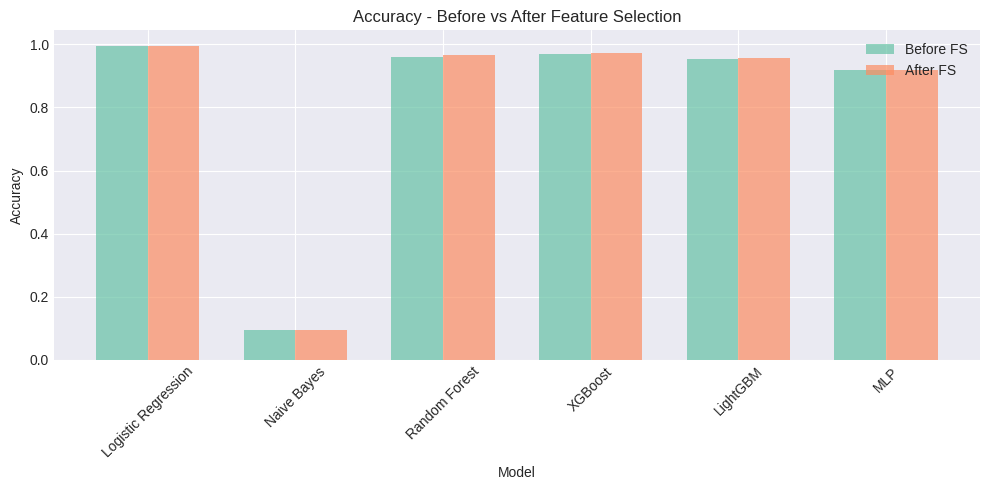

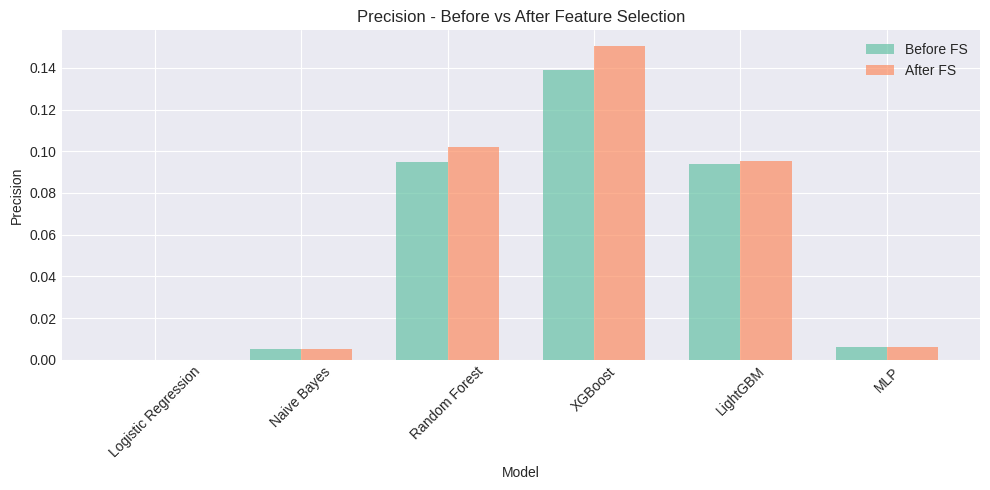

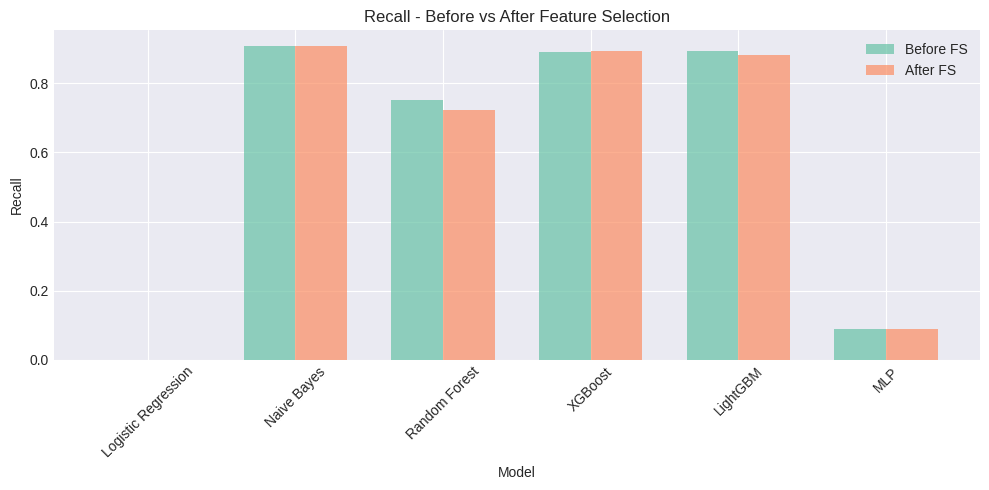

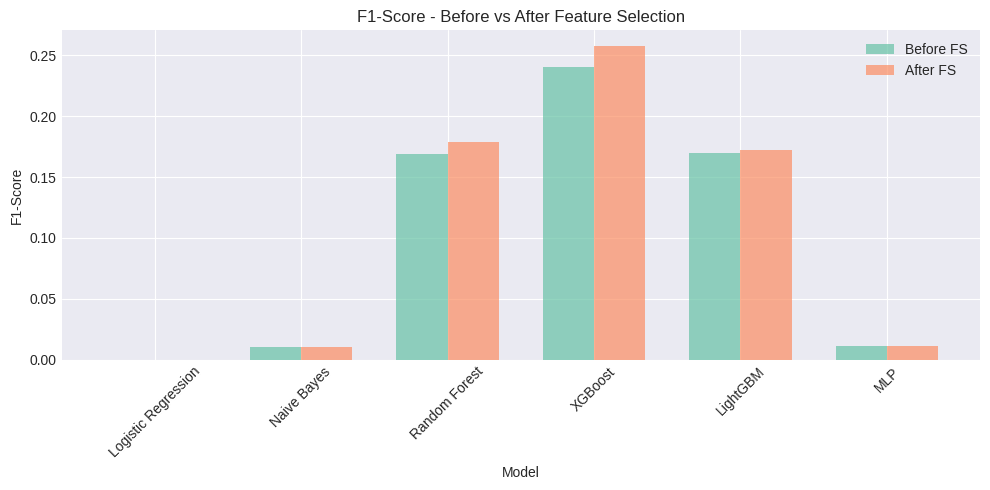

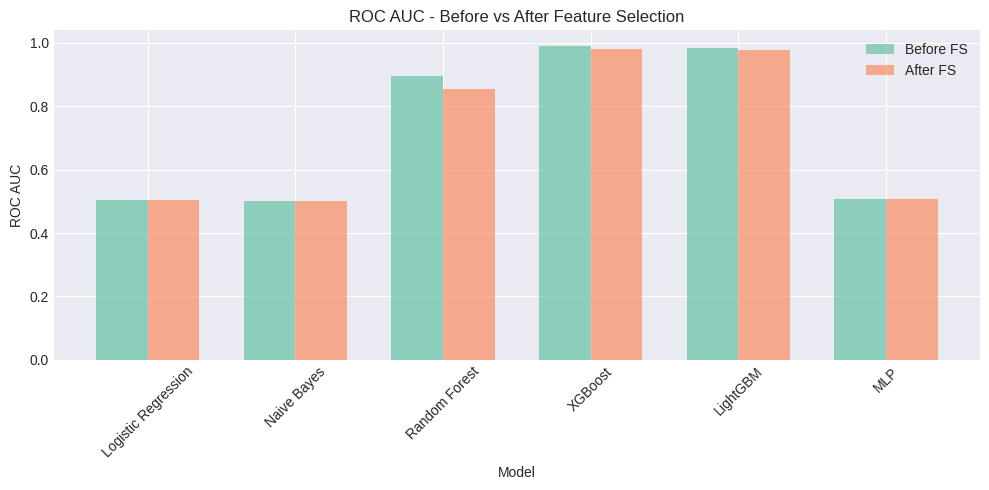

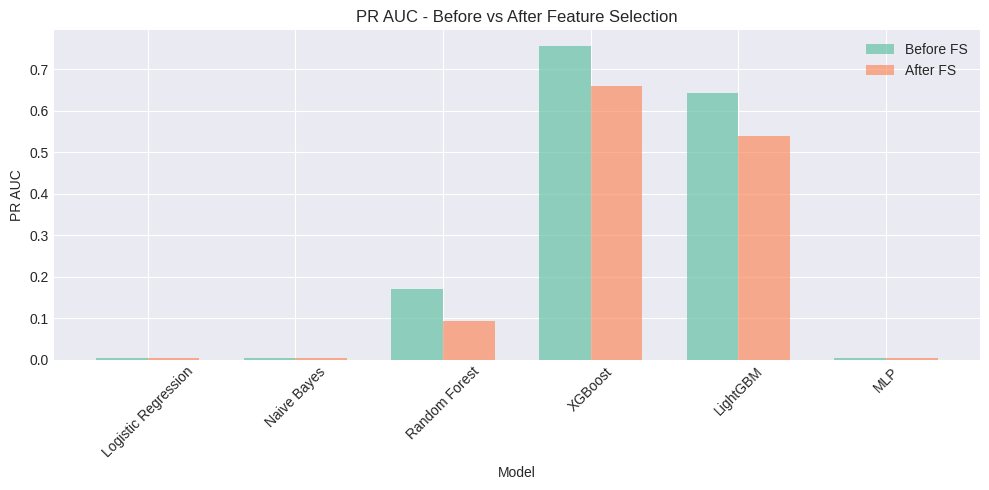

In [58]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC", "PR AUC"]
models_list = comparison["Model"].tolist()
x = np.arange(len(models_list))
width = 0.35

for metric in metrics:
    plt.figure(figsize=(10,5))
    plt.bar(x - width/2, comparison[f"{metric}_BeforeFS"], width, alpha=0.7, label="Before FS")
    plt.bar(x + width/2, comparison[f"{metric}_AfterFS"], width, alpha=0.7, label="After FS")
    plt.xticks(x, models_list, rotation=45)
    plt.title(f"{metric} - Before vs After Feature Selection")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.legend()
    plt.tight_layout()
    plt.show()


#17.Robust Evaluation with Stratified K-Fold CV

##17.1 Data Preparation Selecting Top-15 Features

In [59]:
top_features = [
    'amt','unix_time','age','city_pop','cc_num','lat','long','zip',
    'merch_lat','category_shopping_pos','category_misc_net',
    'category_misc_pos','category_shopping_net','gender','merch_long'
]

X_train_top = X_train[top_features].select_dtypes(include=['int64','float64']).copy()
y_train_top = y_train.copy()

print("Top-15 features selected:", list(X_train_top.columns))
print("Training shape:", X_train_top.shape, y_train_top.shape)



Top-15 features selected: ['amt', 'unix_time', 'age', 'city_pop', 'cc_num', 'lat', 'long', 'zip', 'merch_lat', 'category_shopping_pos', 'category_misc_net', 'category_misc_pos', 'category_shopping_net', 'gender', 'merch_long']
Training shape: (1296675, 15) (1296675,)


##17.2 Defining Models & Pipelines

In [60]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

models = {
    "LightGBM": LGBMClassifier(
        n_estimators=20,
        max_depth=4,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),
    "XGBoost": XGBClassifier(
        n_estimators=20,
        max_depth=3,
        learning_rate=0.2,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method="hist",
        eval_metric="logloss",
        use_label_encoder=False
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=5,
        max_depth=3,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    ),
    "MLP Neural Net": MLPClassifier(
        hidden_layer_sizes=(32,),
        max_iter=50,
        early_stopping=True,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        max_iter=200,
        solver="saga",
        n_jobs=-1,
        random_state=42
    ),
    "Naive Bayes": GaussianNB()
}

def make_pipeline(model):
    return Pipeline(steps=[
        ("smote", SMOTE(random_state=42, sampling_strategy=0.2)),
        ("model", model)
    ])

pipelines = {name: make_pipeline(m) for name, m in models.items()}

print("Pipelines defined:")
for name in pipelines.keys():
    print("-", name)

Pipelines defined:
- LightGBM
- XGBoost
- Random Forest
- MLP Neural Net
- Logistic Regression
- Naive Bayes


##17.3 Apply Stratified K-Fold CV

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, average_precision_score, accuracy_score
import numpy as np

k = 3
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

cv_records = {name: {"precision": [], "recall": [], "f1": [], "roc_auc": [], "pr_auc": [], "accuracy": []}
              for name in pipelines.keys()}

print(f"Running {k}-fold CV on {len(pipelines)} models...")

for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X_train_top, y_train_top), 1):
    print(f"\nFold {fold_idx}/{k}")
    X_tr, X_va = X_train_top.iloc[train_idx], X_train_top.iloc[val_idx]
    y_tr, y_va = y_train_top.iloc[train_idx], y_train_top.iloc[val_idx]

    for name, pipe in pipelines.items():
        print(f"Training {name} on fold {fold_idx}...")
        pipe.fit(X_tr, y_tr)
        y_pred = pipe.predict(X_va)
        y_prob = pipe.predict_proba(X_va)[:, 1] if hasattr(pipe.named_steps['model'], "predict_proba") else None

        prec, rec, f1, _ = precision_recall_fscore_support(y_va, y_pred, average="binary", zero_division=0)
        acc = accuracy_score(y_va, y_pred)
        roc = roc_auc_score(y_va, y_prob) if y_prob is not None else np.nan
        prc = average_precision_score(y_va, y_prob) if y_prob is not None else np.nan

        cv_records[name]["precision"].append(prec)
        cv_records[name]["recall"].append(rec)
        cv_records[name]["f1"].append(f1)
        cv_records[name]["roc_auc"].append(roc)
        cv_records[name]["pr_auc"].append(prc)
        cv_records[name]["accuracy"].append(acc)

print("\nCross-validation complete.")

for name, scores in cv_records.items():
    print(f"\n{name} Results (avg across {k} folds):")
    for metric, values in scores.items():
        print(f"{metric}: {np.nanmean(values):.4f}")



Running 3-fold CV on 6 models...

Fold 1/3
Training LightGBM on fold 1...
[LightGBM] [Info] Number of positive: 171989, number of negative: 859946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2380
[LightGBM] [Info] Number of data points in the train set: 1031935, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:41:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Random Forest on fold 1...
Training MLP Neural Net on fold 1...
Training Logistic Regression on fold 1...
Training Naive Bayes on fold 1...

Fold 2/3
Training LightGBM on fold 2...
[LightGBM] [Info] Number of positive: 171989, number of negative: 859946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2379
[LightGBM] [Info] Number of data points in the train set: 1031935, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:43:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Random Forest on fold 2...
Training MLP Neural Net on fold 2...
Training Logistic Regression on fold 2...
Training Naive Bayes on fold 2...

Fold 3/3
Training LightGBM on fold 3...
[LightGBM] [Info] Number of positive: 171989, number of negative: 859946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2378
[LightGBM] [Info] Number of data points in the train set: 1031935, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:45:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Random Forest on fold 3...
Training MLP Neural Net on fold 3...
Training Logistic Regression on fold 3...
Training Naive Bayes on fold 3...

Cross-validation complete.

LightGBM Results (avg across 3 folds):
precision: 0.0808
recall: 0.7546
f1: 0.1456
roc_auc: 0.9385
pr_auc: 0.2229
accuracy: 0.9530

XGBoost Results (avg across 3 folds):
precision: 0.2463
recall: 0.7282
f1: 0.3681
roc_auc: 0.9325
pr_auc: 0.2950
accuracy: 0.9870

Random Forest Results (avg across 3 folds):
precision: 0.0197
recall: 0.6143
f1: 0.0379
roc_auc: 0.7304
pr_auc: 0.0870
accuracy: 0.7577

MLP Neural Net Results (avg across 3 folds):
precision: 0.0000
recall: 0.0000
f1: 0.0000
roc_auc: 0.5000
pr_auc: 0.0052
accuracy: 0.9948

Logistic Regression Results (avg across 3 folds):
precision: 0.0000
recall: 0.0000
f1: 0.0000
roc_auc: 0.5039
pr_auc: 0.0055
accuracy: 0.9948

Naive Bayes Results (avg across 3 folds):
precision: 0.0000
recall: 0.0000
f1: 0.0000
roc_auc: 0.4980
pr_auc: 0.0055
accuracy: 0.9948


##17.4 Cross-Validation Results Table

In [62]:
summary_rows = []

for name, m in cv_records.items():
    def mean_std(arr):
        return float(np.mean(arr)), float(np.std(arr))

    a_m, a_s = mean_std(m["accuracy"])
    p_m, p_s = mean_std(m["precision"])
    r_m, r_s = mean_std(m["recall"])
    f_m, f_s = mean_std(m["f1"])
    roc_m, roc_s = mean_std(m["roc_auc"])
    pr_m, pr_s = mean_std(m["pr_auc"])

    summary_rows.append([
        name,
        a_m, a_s,
        p_m, p_s,
        r_m, r_s,
        f_m, f_s,
        roc_m, roc_s,
        pr_m, pr_s
    ])

cv_summary = pd.DataFrame(
    summary_rows,
    columns=[
        "Model",
        "Accuracy (Mean)", "Accuracy (Std)",
        "Precision (Mean)", "Precision (Std)",
        "Recall (Mean)", "Recall (Std)",
        "F1-Score (Mean)", "F1-Score (Std)",
        "ROC-AUC (Mean)", "ROC-AUC (Std)",
        "PR-AUC (Mean)", "PR-AUC (Std)"
    ]
).sort_values("F1-Score (Mean)", ascending=False)

numeric_cols = cv_summary.select_dtypes(include=['float64']).columns
display(cv_summary.style.format({col: "{:.4f}" for col in numeric_cols}))



,Model,Accuracy (Mean),Accuracy (Std),Precision (Mean),Precision (Std),Recall (Mean),Recall (Std),F1-Score (Mean),F1-Score (Std),ROC-AUC (Mean),ROC-AUC (Std),PR-AUC (Mean),PR-AUC (Std)
1,XGBoost,0.9870,0.0002,0.2463,0.0051,0.7282,0.0113,0.3681,0.0072,0.9325,0.0058,0.2950,0.0151
0,LightGBM,0.9530,0.0069,0.0808,0.0117,0.7546,0.0134,0.1456,0.0188,0.9385,0.0047,0.2229,0.0401
2,Random Forest,0.7577,0.1684,0.0197,0.0096,0.6143,0.0254,0.0379,0.0181,0.7304,0.0881,0.0870,0.0418
3,MLP Neural Net,0.9948,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.0052,0.0000
4,Logistic Regression,0.9948,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5039,0.0073,0.0055,0.0003
5,Naive Bayes,0.9948,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4980,0.0018,0.0055,0.0003


##17.5 Comparison Bar Charts

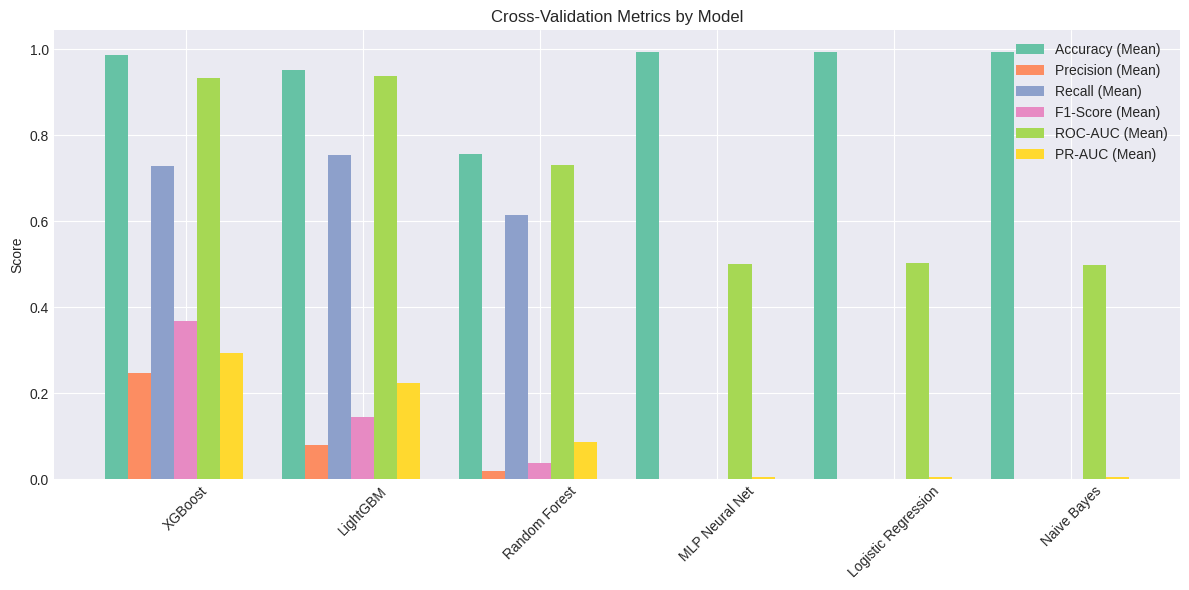

In [63]:
plot_df = cv_summary.copy()

plot_df = plot_df[[
    "Model",
    "Accuracy (Mean)",
    "Precision (Mean)",
    "Recall (Mean)",
    "F1-Score (Mean)",
    "ROC-AUC (Mean)",
    "PR-AUC (Mean)"
]]

metrics = ["Accuracy (Mean)", "Precision (Mean)", "Recall (Mean)", "F1-Score (Mean)", "ROC-AUC (Mean)", "PR-AUC (Mean)"]
x = np.arange(len(plot_df["Model"]))
width = 0.13

plt.figure(figsize=(12,6))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, plot_df[metric], width, label=metric)

plt.xticks(x + width*len(metrics)/2, plot_df["Model"], rotation=45)
plt.ylabel("Score")
plt.title("Cross-Validation Metrics by Model")
plt.legend()
plt.tight_layout()
plt.show()


##17.6 Identifying Top 2 Models

In [64]:
top2 = cv_summary.sort_values("F1-Score (Mean)", ascending=False).head(2)
print("\nTop 2 models by F1-Score across folds:\n")
display(top2.style.format({col: "{:.4f}" for col in numeric_cols}))




Top 2 models by F1-Score across folds:



,Model,Accuracy (Mean),Accuracy (Std),Precision (Mean),Precision (Std),Recall (Mean),Recall (Std),F1-Score (Mean),F1-Score (Std),ROC-AUC (Mean),ROC-AUC (Std),PR-AUC (Mean),PR-AUC (Std)
1,XGBoost,0.9870,0.0002,0.2463,0.0051,0.7282,0.0113,0.3681,0.0072,0.9325,0.0058,0.2950,0.0151
0,LightGBM,0.9530,0.0069,0.0808,0.0117,0.7546,0.0134,0.1456,0.0188,0.9385,0.0047,0.2229,0.0401


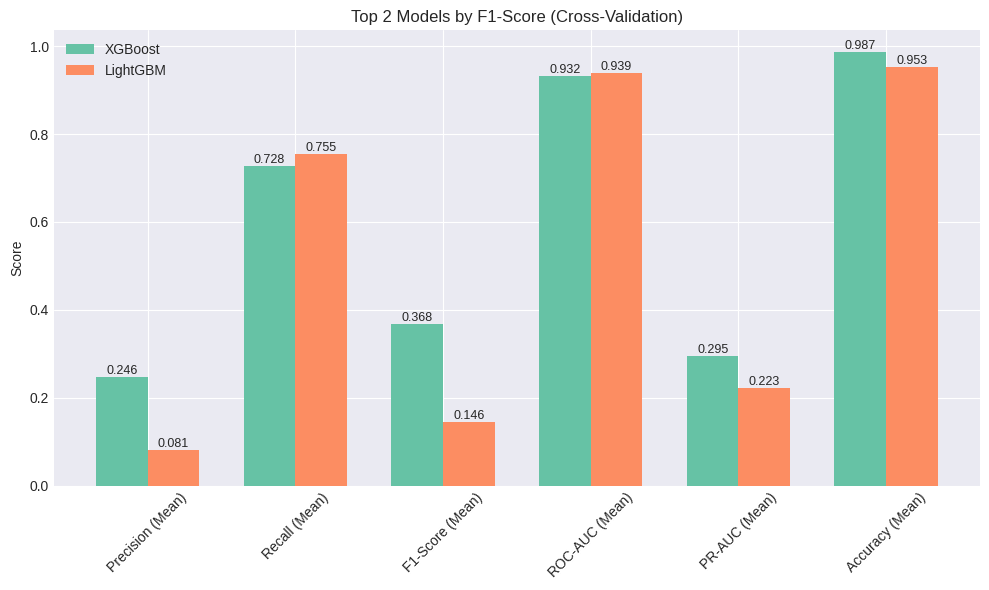

In [85]:
top2 = plot_df.sort_values("F1-Score (Mean)", ascending=False).head(2)

metrics = ["Precision (Mean)", "Recall (Mean)", "F1-Score (Mean)", "ROC-AUC (Mean)", "PR-AUC (Mean)", "Accuracy (Mean)"]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))

for i, (idx, row) in enumerate(top2.iterrows()):
    bars = plt.bar(x + i*width, [row[m] for m in metrics], width, label=row["Model"])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.3f}", ha='center', va='bottom', fontsize=9)

plt.xticks(x + width/2, metrics, rotation=45)
plt.ylabel("Score")
plt.title("Top 2 Models by F1-Score (Cross-Validation)")
plt.legend()
plt.tight_layout()
plt.show()



#18.Hyperparameter Tuning of Top Models

##18.1 Defining Parameter Grids




In [86]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np

param_grid_xgb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

param_grid_lgb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "num_leaves": [31, 63],
    "max_depth": [-1, 7, 10],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

print("Optimized parameter grids defined for XGBoost and LightGBM")


Optimized parameter grids defined for XGBoost and LightGBM


##18.2 Initializing Models

In [87]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb_base = XGBClassifier(
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    tree_method="hist"
)

lgbm_base = LGBMClassifier(
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

print("Parameter grids defined for XGBoost and LightGBM Models")


Parameter grids defined for XGBoost and LightGBM Models


##18.3 Run Hyperparameter Tuning

In [88]:
cv_strategy = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid_xgb,
    n_iter=5,
    scoring="f1",
    cv=cv_strategy,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

lgbm_search = RandomizedSearchCV(
    estimator=lgbm_base,
    param_distributions=param_grid_lgb,
    n_iter=5,
    scoring="f1",
    cv=cv_strategy,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

X_sample = X_train_resampled_selected.sample(200000, random_state=42)
y_sample = y_train_resampled.loc[X_sample.index]

print("\nRunning RandomizedSearchCV for XGBoost...")
xgb_search.fit(X_sample, y_sample)

print("\nRunning RandomizedSearchCV for LightGBM...")
lgbm_search.fit(X_sample, y_sample)




Running RandomizedSearchCV for XGBoost...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:08:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Running RandomizedSearchCV for LightGBM...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[LightGBM] [Info] Number of positive: 99698, number of negative: 100302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(class_weight='balanced', n_jobs=-1,
                                            random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.05, 0.1],
                                        'max_depth': [-1, 7, 10],
                                        'n_estimators': [100, 200],
                                        'num_leaves': [31, 63],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

##18.4 Hyperparameter Tuning Results

In [89]:
xgb_best = xgb_search.best_estimator_
lgbm_best = lgbm_search.best_estimator_

results_tuning = pd.DataFrame({
    "Model": ["XGBoost", "LightGBM"],
    "Best Params": [xgb_search.best_params_, lgbm_search.best_params_],
    "Best CV F1-Score": [xgb_search.best_score_, lgbm_search.best_score_]
})

print("\nHyperparameter Tuning Results:\n")
display(results_tuning)



Hyperparameter Tuning Results:



,Model,Best Params,Best CV F1-Score
0,XGBoost,"{'subsample': 1.0, 'n_estimators': 200, 'max_d...",0.935106
1,LightGBM,"{'subsample': 0.8, 'num_leaves': 63, 'n_estima...",0.967284


In [90]:
import pprint

print("\nBest Hyperparameters Found:")

print("\nXGBoost Best Params:")
pprint.pprint(xgb_search.best_params_, width=120)

print("\nLightGBM Best Params:")
pprint.pprint(lgbm_search.best_params_, width=120)

print("\nXGBoost Best F1 Score: {:.4f}".format(xgb_search.best_score_))
print("LightGBM Best F1 Score: {:.4f}".format(lgbm_search.best_score_))



Best Hyperparameters Found:

XGBoost Best Params:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

LightGBM Best Params:
{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'num_leaves': 63,
 'subsample': 0.8}

XGBoost Best F1 Score: 0.9351
LightGBM Best F1 Score: 0.9673


##18.5 Compare Tuned Models

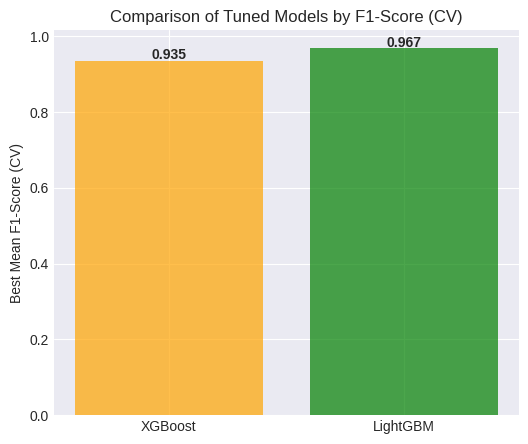

In [91]:
plt.figure(figsize=(6,5))
plt.bar(results_tuning["Model"], results_tuning["Best CV F1-Score"], color=["orange","green"], alpha=0.7)
for i, v in enumerate(results_tuning["Best CV F1-Score"]):
    plt.text(i, v + 0.005, f"{v:.3f}", ha="center", fontsize=10, fontweight="bold")
plt.title("Comparison of Tuned Models by F1-Score (CV)")
plt.ylabel("Best Mean F1-Score (CV)")
plt.show()



#19.Statistical Comparison

In [92]:
from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score,
                             average_precision_score, confusion_matrix, ConfusionMatrixDisplay)
from scipy.stats import ttest_rel, wilcoxon

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


##19.1 Building Top Models after Hyperparameter Tuning

In [93]:
xgb_tuned = xgb_search.best_estimator_
lgbm_tuned = lgbm_search.best_estimator_

xgb_tuned.fit(X_train_resampled_selected, y_train_resampled)
lgbm_tuned.fit(X_train_resampled_selected, y_train_resampled)

print("Top models trained with best tuned hyperparameters\n")
print("\nXGBoost Best Params:", xgb_search.best_params_)
print("LightGBM Best Params:", lgbm_search.best_params_)

print("\nXGBoost Best CV F1 Score: {:.4f}".format(xgb_search.best_score_))
print("LightGBM Best CV F1 Score: {:.4f}".format(lgbm_search.best_score_))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:10:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 1289919, number of negative: 1289919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 2579838, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Top models trained with best tuned hyperparameters


XGBoost Best Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
LightGBM Best Params: {'subsample': 0.8, 'num_leaves': 63, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

XGBoost Best CV F1 Score: 0.9351
LightGBM Best CV F1 Score: 0.9673


##19.2 Evaluating Tuned Models Performances on Test Set



In [94]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score
)

def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc = roc_auc_score(y, y_prob)
    pr_auc = average_precision_score(y, y_prob)
    accuracy = accuracy_score(y, y_pred)

    return {
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc,
        "PR-AUC": pr_auc,
        "Accuracy": accuracy,
        "y_true": y,
        "y_pred": y_pred
    }



##19.3 Model Performances on Test Set after Hyperparameter Tuning

In [95]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
)

def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc = roc_auc_score(y, y_prob)
    pr_auc = average_precision_score(y, y_prob)
    accuracy = accuracy_score(y, y_pred)

    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc,
        "PR-AUC": pr_auc,
        "y_true": y,
        "y_pred": y_pred
    }

results_tuned = []
results_tuned.append(evaluate_model(xgb_tuned, X_val_selected, y_val, "XGBoost (Tuned)"))
results_tuned.append(evaluate_model(lgbm_tuned, X_val_selected, y_val, "LightGBM (Tuned)"))

metrics_df = pd.DataFrame(results_tuned)[["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "PR-AUC"]]

for col in ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "PR-AUC"]:
    metrics_df[col] = metrics_df[col].round(3)

display(metrics_df.style.set_caption("Top Model Performance Metrics on Validation/Test Set")
        .set_table_styles([
            {"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold"), ("color", "black")]}
        ]))


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC
0,XGBoost (Tuned),0.954000,0.091000,0.876000,0.165000,0.977000,0.543000
1,LightGBM (Tuned),0.978000,0.179000,0.888000,0.298000,0.984000,0.694000


In [96]:
from sklearn.metrics import classification_report

print("Classification Report for XGBoost (Tuned):")
print(classification_report(y_val, xgb_tuned.predict(X_val_selected)))

print("Classification Report for LightGBM (Tuned):")
print(classification_report(y_val, lgbm_tuned.predict(X_val_selected)))



Classification Report for XGBoost (Tuned):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    276412
           1       0.09      0.88      0.17      1447

    accuracy                           0.95    277859
   macro avg       0.55      0.91      0.57    277859
weighted avg       0.99      0.95      0.97    277859

Classification Report for LightGBM (Tuned):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    276412
           1       0.18      0.89      0.30      1447

    accuracy                           0.98    277859
   macro avg       0.59      0.93      0.64    277859
weighted avg       1.00      0.98      0.99    277859



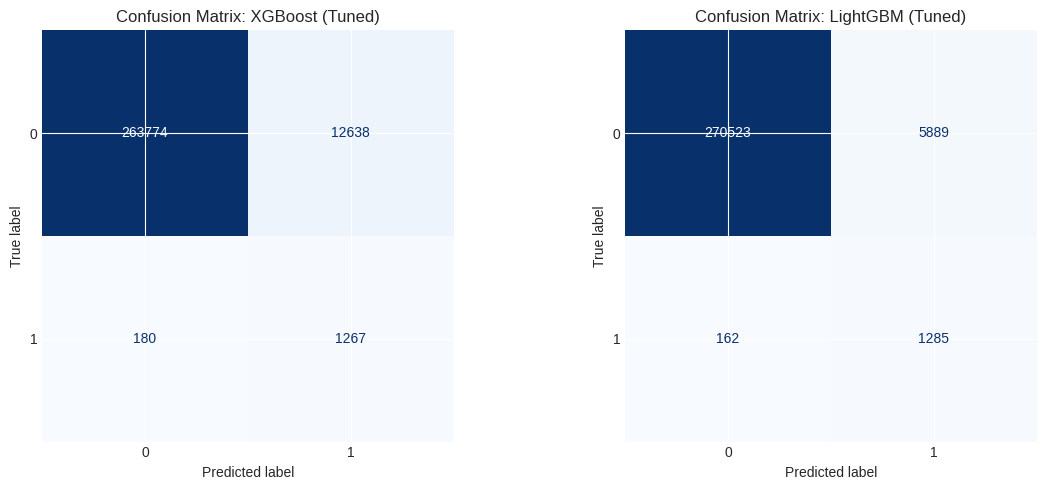

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, result in zip(axes, results_tuned):
    cm = confusion_matrix(result["y_true"], result["y_pred"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(f"Confusion Matrix: {result['Model']}")

plt.tight_layout()
plt.show()



##19.4 Statistical Significance Tests

In [98]:
from sklearn.metrics import f1_score, average_precision_score
from scipy.stats import ttest_rel, wilcoxon

baseline_f1_xgb = cv_records["XGBoost"]["f1"]
tuned_f1_xgb = [f1_score(y_val, xgb_tuned.predict(X_val_selected))] * len(baseline_f1_xgb)

baseline_pr_xgb = cv_records["XGBoost"]["pr_auc"]
tuned_pr_xgb = [average_precision_score(y_val, xgb_tuned.predict_proba(X_val_selected)[:,1])] * len(baseline_pr_xgb)

baseline_f1_lgb = cv_records["LightGBM"]["f1"]
tuned_f1_lgb = [f1_score(y_val, lgbm_tuned.predict(X_val_selected))] * len(baseline_f1_lgb)

baseline_pr_lgb = cv_records["LightGBM"]["pr_auc"]
tuned_pr_lgb = [average_precision_score(y_val, lgbm_tuned.predict_proba(X_val_selected)[:,1])] * len(baseline_pr_lgb)

t_f1_xgb, p_f1_xgb = ttest_rel(baseline_f1_xgb, tuned_f1_xgb)
w_f1_xgb, pw_f1_xgb = wilcoxon(baseline_f1_xgb, tuned_f1_xgb)

t_pr_xgb, p_pr_xgb = ttest_rel(baseline_pr_xgb, tuned_pr_xgb)
w_pr_xgb, pw_pr_xgb = wilcoxon(baseline_pr_xgb, tuned_pr_xgb)

t_f1_lgb, p_f1_lgb = ttest_rel(baseline_f1_lgb, tuned_f1_lgb)
w_f1_lgb, pw_f1_lgb = wilcoxon(baseline_f1_lgb, tuned_f1_lgb)

t_pr_lgb, p_pr_lgb = ttest_rel(baseline_pr_lgb, tuned_pr_lgb)
w_pr_lgb, pw_pr_lgb = wilcoxon(baseline_pr_lgb, tuned_pr_lgb)

stats_df = pd.DataFrame({
    "Model":["XGBoost","XGBoost","LightGBM","LightGBM"],
    "Metric":["F1-Score","PR-AUC","F1-Score","PR-AUC"],
    "T-test p-value":[p_f1_xgb, p_pr_xgb, p_f1_lgb, p_pr_lgb],
    "Wilcoxon p-value":[pw_f1_xgb, pw_pr_xgb, pw_f1_lgb, pw_pr_lgb]
})

print("\nStatistical Significance Tests (Baseline vs Tuned):\n")
display(stats_df)



Statistical Significance Tests (Baseline vs Tuned):



,Model,Metric,T-test p-value,Wilcoxon p-value
0,XGBoost,F1-Score,0.000621,0.25
1,XGBoost,PR-AUC,0.001844,0.25
2,LightGBM,F1-Score,0.007476,0.25
3,LightGBM,PR-AUC,0.003602,0.25


##19.5 Final Best Model Selection

In [99]:
from sklearn.metrics import f1_score

xgb_f1 = f1_score(y_val, xgb_tuned.predict(X_val_selected))
lgbm_f1 = f1_score(y_val, lgbm_tuned.predict(X_val_selected))

model_scores = {
    "XGBoost (Tuned)": xgb_f1,
    "LightGBM (Tuned)": lgbm_f1
}

best_model_name = max(model_scores, key=model_scores.get)
print("Best Performing Model\n")
print(f"Selected Model: {best_model_name}")
print(f"F1-score: {model_scores[best_model_name]:.4f}")
print("\nJustification: This model was selected because it achieved the highest F1-score, balancing precision and recall, which is critical in fraud detection where missing fraudulent cases (false negatives) is costly.")


Best Performing Model

Selected Model: LightGBM (Tuned)
F1-score: 0.2981

Justification: This model was selected because it achieved the highest F1-score, balancing precision and recall, which is critical in fraud detection where missing fraudulent cases (false negatives) is costly.


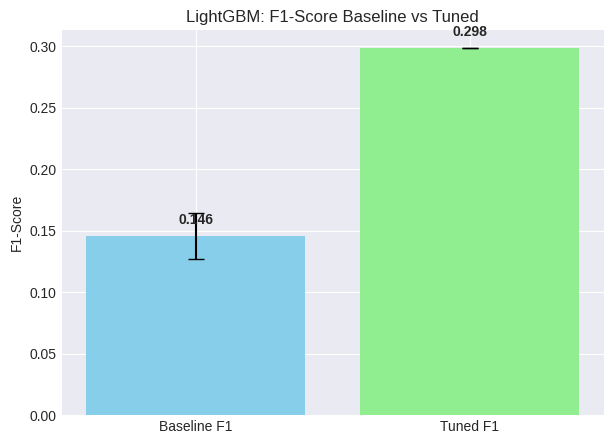

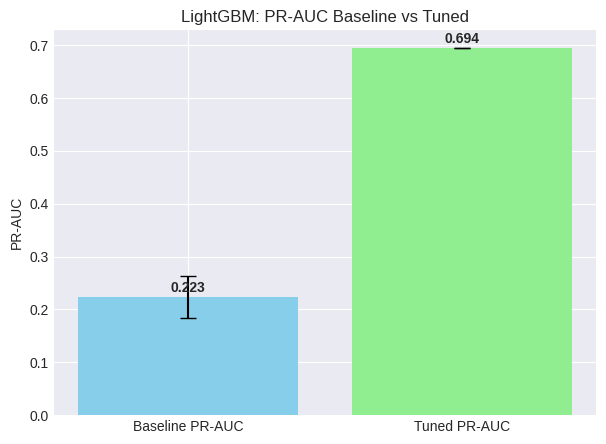

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, average_precision_score

baseline_f1_lgbm = cv_records["LightGBM"]["f1"]
tuned_f1_lgbm = [f1_score(y_val, lgbm_tuned.predict(X_val_selected))] * len(baseline_f1_lgbm)

baseline_pr_lgbm = cv_records["LightGBM"]["pr_auc"]
tuned_pr_lgbm = [average_precision_score(y_val, lgbm_tuned.predict_proba(X_val_selected)[:,1])] * len(baseline_pr_lgbm)

f1_means = [np.mean(baseline_f1_lgbm), np.mean(tuned_f1_lgbm)]
f1_stds = [np.std(baseline_f1_lgbm), np.std(tuned_f1_lgbm)]

pr_means = [np.mean(baseline_pr_lgbm), np.mean(tuned_pr_lgbm)]
pr_stds = [np.std(baseline_pr_lgbm), np.std(tuned_pr_lgbm)]

plt.figure(figsize=(7,5))
plt.bar(["Baseline F1", "Tuned F1"], f1_means, yerr=f1_stds, capsize=6, color=["skyblue","lightgreen"])
plt.title("LightGBM: F1-Score Baseline vs Tuned")
plt.ylabel("F1-Score")
for i, v in enumerate(f1_means):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=10, fontweight="bold")
plt.show()

plt.figure(figsize=(7,5))
plt.bar(["Baseline PR-AUC", "Tuned PR-AUC"], pr_means, yerr=pr_stds, capsize=6, color=["skyblue","lightgreen"])
plt.title("LightGBM: PR-AUC Baseline vs Tuned")
plt.ylabel("PR-AUC")
for i, v in enumerate(pr_means):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=10, fontweight="bold")
plt.show()



In [102]:
print("\nInterpretation for the Final Model: LightGBM (Tuned)")

if p_f1_lgb < 0.05:
    print("- F1-Score improvement after tuning is statistically significant (p < 0.05).")
else:
    print("- F1-Score improvement is NOT statistically significant.")

if p_pr_lgb < 0.05:
    print("- PR-AUC improvement after tuning is statistically significant (p < 0.05).")
else:
    print("- PR-AUC improvement is NOT statistically significant.")



Interpretation for the Final Model: LightGBM (Tuned)
- F1-Score improvement after tuning is statistically significant (p < 0.05).
- PR-AUC improvement after tuning is statistically significant (p < 0.05).


#20.Model Performance Visualization

##20.1 ROC Curves of Top 2 Tuned Models

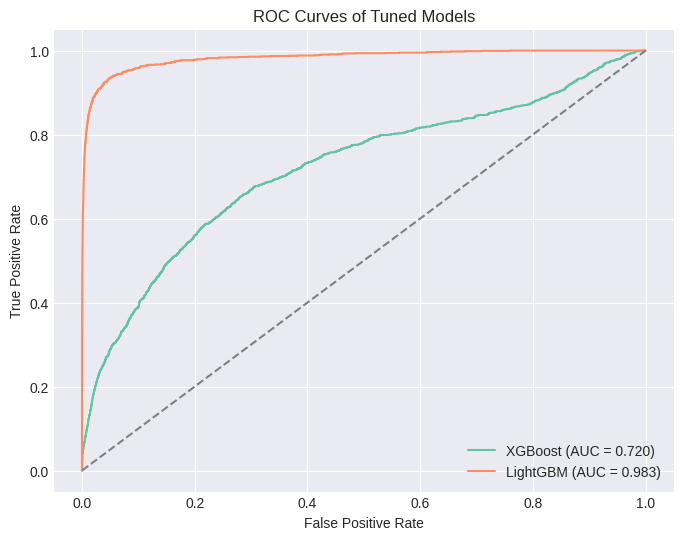

In [103]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X_test_selected = X_test[top_features]
X_test_selected = X_test_selected.reindex(columns=xgb_tuned.feature_names_in_)

xgb_probs = xgb_tuned.predict_proba(X_test_selected)[:, 1]
lgbm_probs = lgbm_tuned.predict_proba(X_test_selected)[:, 1]

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, lgbm_probs)

roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})")
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LightGBM (AUC = {roc_auc_lgbm:.3f})")
plt.plot([0,1], [0,1], "--", color="gray")
plt.title("ROC Curves of Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


##20.2 Precision–Recall Curves

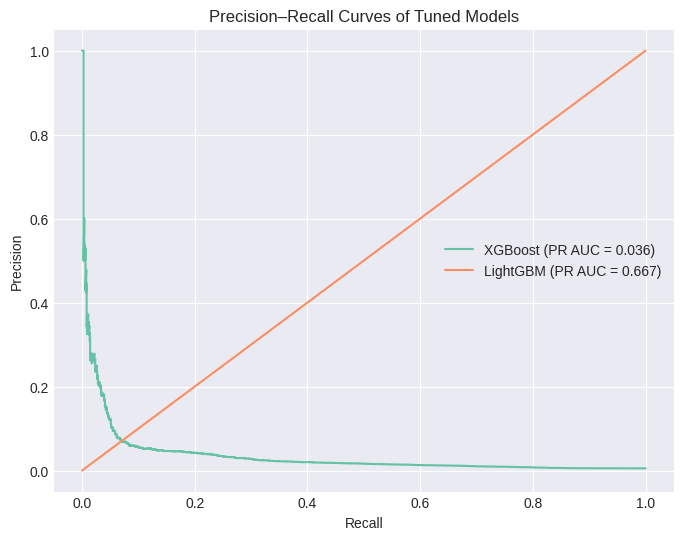

In [104]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, xgb_probs)
prec_lgbm, rec_lgbm, _ = precision_recall_curve(y_test, lgbm_probs)

pr_auc_xgb = average_precision_score(y_test, xgb_probs)
pr_auc_lgbm = average_precision_score(y_test, lgbm_probs)

plt.figure(figsize=(8,6))
plt.plot(rec_xgb, prec_xgb, label=f"XGBoost (PR AUC = {pr_auc_xgb:.3f})")
plt.plot(rec_lgbm, rec_lgbm, label=f"LightGBM (PR AUC = {pr_auc_lgbm:.3f})")
plt.title("Precision–Recall Curves of Tuned Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


##20.3 Bar Chart Comparing Tuned Metrics

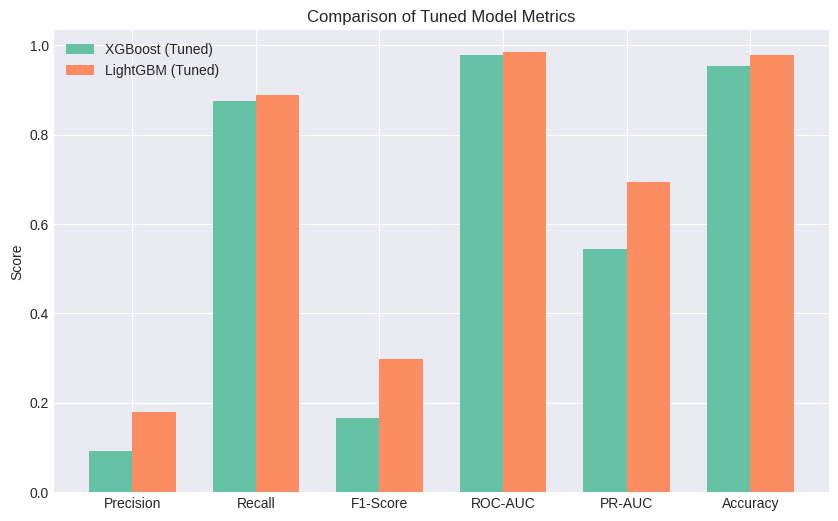

In [105]:
tuned_metrics = pd.DataFrame({
    "Model": ["XGBoost (Tuned)", "LightGBM (Tuned)"],
    "Precision": [results_tuned[0]["Precision"], results_tuned[1]["Precision"]],
    "Recall": [results_tuned[0]["Recall"], results_tuned[1]["Recall"]],
    "F1-Score": [results_tuned[0]["F1-Score"], results_tuned[1]["F1-Score"]],
    "ROC-AUC": [results_tuned[0]["ROC-AUC"], results_tuned[1]["ROC-AUC"]],
    "PR-AUC": [results_tuned[0]["PR-AUC"], results_tuned[1]["PR-AUC"]],
    "Accuracy": [results_tuned[0]["Accuracy"], results_tuned[1]["Accuracy"]]
})

metrics = ["Precision","Recall","F1-Score","ROC-AUC","PR-AUC","Accuracy"]
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, tuned_metrics.iloc[0,1:], width, label="XGBoost (Tuned)")
plt.bar(x + width/2, tuned_metrics.iloc[1,1:], width, label="LightGBM (Tuned)")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Comparison of Tuned Model Metrics")
plt.legend()
plt.show()
